# Delhivery Case_study

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. 

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# Business Problem

The company wants to understand and process the data coming out of data engineering pipelines:

*  Clean, sanitize and manipulate data to get useful features out of raw fields
*  Make sense out of the raw data and help the data science team to build forecasting models on it


# Column Profiling:

*    data - tells whether the data is testing or training data
*    trip_creation_time – Timestamp of trip creation
*    route_schedule_uuid – Unique Id for a particular route schedule
*    route_type – Transportation type
*    FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or             drop-offs along the way
*    Carting: Handling system consisting of small vehicles (carts)
*    trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
*    source_center - Source ID of trip origin
*    source_name - Source Name of trip origin
*    destination_cente – Destination ID
*    destination_name – Destination Name
*    od_start_time – Trip start time
*    od_end_time – Trip end time
*    start_scan_to_end_scan – Time taken to deliver from source to destination
*    is_cutoff – Unknown field
*    cutoff_factor – Unknown field
*    cutoff_timestamp – Unknown field
*    actual_distance_to_destination – Distance in Kms between source and destination warehouse
*    actual_time – Actual time taken to complete the delivery (Cumulative)
*    osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given        map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
*    osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes      usual traffic, distance through major and minor roads) (Cumulative)
*    factor – Unknown field
*    segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
*    segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
*    segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
*    segment_factor – Unknown field


In [1]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
#import calendar

In [2]:
df=pd.read_csv('delhivery_data.csv')
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [3]:
df.shape

(144867, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Formatting the Data in a more readable way

In [6]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

# Observations

* there are missing values in source_name and destination_name

In [8]:
# filling in format of others values in that column
df["source_name"].fillna("NO_Place (NO_state)", inplace = True)
df["destination_name"].fillna("NO_Place (NO_state)", inplace = True)

In [9]:
# extracting Features from given data
df['Source_City']=df['source_name'].apply(lambda x: x.split("(")[0])  #Make city Feature from Source
df['Source_State']=df['source_name'].apply(lambda x: x.split("(")[1].split(')')[0]) #Make State Feature from Source
df['Dest_City']=df['destination_name'].apply(lambda x: x.split("(")[0])  #Make city Feature from Destiny
df['Dest_State']=df['destination_name'].apply(lambda x: x.split("(")[1].split(')')[0]) #Make State Feature from Destiny

In [10]:
df.drop(['source_name','destination_name'],axis=1,inplace=True)

In [11]:
# extracting Features from given data
df['trip_year'] = df['trip_creation_time'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
df['Trip_month'] = df['trip_creation_time'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
df['Trip_day'] = df['trip_creation_time'].apply(lambda x: x.split()[0].split('-')[2]) # Make day feature

In [12]:
#converting colums to datetime format to subtract them
df['od_start_time']= pd.to_datetime(df['od_start_time'])
df['od_end_time']= pd.to_datetime(df['od_end_time'])

In [13]:
#finding total time 
df['total_od_time']=df['od_end_time']-df['od_start_time']

In [14]:
df.drop(['od_start_time','od_end_time'],axis=1,inplace=True)

In [15]:
# converting the datetime into seconds to compare with other columns
df['total_od_time']=(df['total_od_time'].dt.total_seconds())/60

In [16]:
df['total_od_time']=df['total_od_time'].round(decimals = 2)

In [17]:
df.drop(['factor','segment_factor','is_cutoff','cutoff_factor','cutoff_timestamp',
         'data','trip_creation_time'],axis=1,inplace=True)

In [18]:
df

,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,segment_osrm_time,segment_osrm_distance,Source_City,Source_State,Dest_City,Dest_State,trip_year,Trip_month,Trip_day,total_od_time
0,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,...,11.0,11.9653,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018,09,20,86.21
1,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,...,9.0,9.7590,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018,09,20,86.21
2,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,...,7.0,10.8152,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018,09,20,86.21
3,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,...,12.0,13.0224,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018,09,20,86.21
4,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,...,5.0,3.9153,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018,09,20,86.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,45.258278,94.0,60.0,67.9280,...,12.0,8.1858,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018,09,20,427.69
144863,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,54.092531,120.0,76.0,85.6829,...,21.0,17.3725,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018,09,20,427.69
144864,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,66.163591,140.0,88.0,97.0933,...,34.0,20.7053,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018,09,20,427.69
144865,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,73.680667,158.0,98.0,111.2709,...,27.0,18.8885,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018,09,20,427.69


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   route_schedule_uuid             144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   trip_uuid                       144867 non-null  object 
 3   source_center                   144867 non-null  object 
 4   destination_center              144867 non-null  object 
 5   start_scan_to_end_scan          144867 non-null  float64
 6   actual_distance_to_destination  144867 non-null  float64
 7   actual_time                     144867 non-null  float64
 8   osrm_time                       144867 non-null  float64
 9   osrm_distance                   144867 non-null  float64
 10  segment_actual_time             144867 non-null  float64
 11  segment_osrm_time               144867 non-null  float64
 12  segment_osrm_dis

In [25]:
# doing groupby based on 'trip_uuid','source_center','destination_center'
df_new=df.groupby(['trip_uuid','source_center','destination_center']).agg({'actual_distance_to_destination':'last',
                                                                    'actual_time':'last','osrm_distance':'last',
                                                                    'osrm_time':'last','segment_actual_time':'sum',
                                                                    'segment_osrm_time':'sum','segment_osrm_distance':'sum',
                                                                    'start_scan_to_end_scan':'last','total_od_time':'last',
                                                                    'route_type':'first','Source_City':'first',
                                                                    'Source_State':'first','Dest_City':'first',
                                                                    'Dest_State':'first','trip_year':'first',
                                                                    'Trip_month':'first','Trip_day':'first'
                                                                          })

df_new

actual_distance_to_destination  \
trip_uuid               source_center destination_center                                   
trip-153671041653548748 IND209304AAA  IND000000ACB                            383.759164   
                        IND462022AAA  IND209304AAA                            440.973689   
trip-153671042288605164 IND561203AAB  IND562101AAA                             24.644021   
                        IND572101AAA  IND561203AAB                             48.542890   
trip-153671043369099517 IND000000ACB  IND160002AAC                            237.439610   
...                                                                                  ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                             33.627182   
                        IND628613AAA  IND627005AAA                             33.673835   
                        IND628801AAA  IND628204AAA                             12.661945   
trip-153861118270144424 IND583119AAA  IND583101AAA                             40.546740   
                        IND583201AAA  IND583119AAA                             25.534793   

                                                          actual_time  \
trip_uuid               source_center destination_center                
trip-153671041653548748 IND209304AAA  IND000000ACB              732.0   
                        IND462022AAA  IND209304AAA              830.0   
trip-153671042288605164 IND561203AAB  IND562101AAA               47.0   
                        IND572101AAA  IND561203AAB               96.0   
trip-153671043369099517 IND000000ACB  IND160002AAC              611.0   
...                                                               ...   
trip-153861115439069069 IND628204AAA  IND627657AAA               51.0   
                        IND628613AAA  IND627005AAA               90.0   
                        IND628801AAA  IND628204AAA               30.0   
trip-153861118270144424 IND583119AAA  IND583101AAA              233.0   
                        IND583201AAA  IND583119AAA               42.0   

                                                          osrm_distance  \
trip_uuid               source_center destination_center                  
trip-153671041653548748 IND209304AAA  IND000000ACB             446.5496   
                        IND462022AAA  IND209304AAA             544.8027   
trip-153671042288605164 IND561203AAB  IND562101AAA              28.1994   
                        IND572101AAA  IND561203AAB              56.9116   
trip-153671043369099517 IND000000ACB  IND160002AAC             281.2109   
...                                                                 ...   
trip-153861115439069069 IND628204AAA  IND627657AAA              42.5213   
                        IND628613AAA  IND627005AAA              40.6080   
                        IND628801AAA  IND628204AAA              16.0185   
trip-153861118270144424 IND583119AAA  IND583101AAA              52.5303   
                        IND583201AAA  IND583119AAA              28.0484   

                                                          osrm_time  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB            329.0   
                        IND462022AAA  IND209304AAA            388.0   
trip-153671042288605164 IND561203AAB  IND562101AAA             26.0   
                        IND572101AAA  IND561203AAB             42.0   
trip-153671043369099517 IND000000ACB  IND160002AAC            212.0   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA             41.0   
                        IND628613AAA  IND627005AAA             48.0   
                        IND628801AAA  IND628204AAA             14.0   
trip-153861118270144424 IND583119AAA  IND583101AAA             42.0   
                        IND583201AAA  IND583119AAA             26.0   

           

In [26]:
df_new.columns

Index(['actual_distance_to_destination', 'actual_time', 'osrm_distance',
       'osrm_time', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'start_scan_to_end_scan', 'total_od_time',
       'route_type', 'Source_City', 'Source_State', 'Dest_City', 'Dest_State',
       'trip_year', 'Trip_month', 'Trip_day'],
      dtype='object')

In [27]:
#Not all columns are present so applying reset index 
df1=df_new.reset_index()
df1

,trip_uuid,source_center,destination_center,actual_distance_to_destination,actual_time,osrm_distance,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,total_od_time,route_type,Source_City,Source_State,Dest_City,Dest_State,trip_year,Trip_month,Trip_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,383.759164,732.0,446.5496,329.0,728.0,534.0,670.6205,1260.0,1260.60,FTL,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,Haryana,2018,09,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,440.973689,830.0,544.8027,388.0,820.0,474.0,649.8528,999.0,999.51,FTL,Bhopal_Trnsport_H,Madhya Pradesh,Kanpur_Central_H_6,Uttar Pradesh,2018,09,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,24.644021,47.0,28.1994,26.0,46.0,26.0,28.1995,58.0,58.83,Carting,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Karnataka,2018,09,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,48.542890,96.0,56.9116,42.0,95.0,39.0,55.9899,122.0,122.78,Carting,Tumkur_Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Karnataka,2018,09,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,237.439610,611.0,281.2109,212.0,608.0,231.0,317.7408,834.0,834.64,FTL,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,Punjab,2018,09,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,33.627182,51.0,42.5213,41.0,49.0,42.0,42.1431,62.0,62.12,Carting,Tirchchndr_Shnmgprm_D,Tamil Nadu,Thisayanvilai_UdnkdiRD_D,Tamil Nadu,2018,10,03
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,33.673835,90.0,40.6080,48.0,89.0,77.0,78.5869,91.0,91.09,Carting,Peikulam_SriVnktpm_D,Tamil Nadu,Tirunelveli_VdkkuSrt_I,Tamil Nadu,2018,10,03
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,12.661945,30.0,16.0185,14.0,29.0,14.0,16.0184,44.0,44.17,Carting,Eral_Busstand_D,Tamil Nadu,Tirchchndr_Shnmgprm_D,Tamil Nadu,2018,10,03
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,40.546740,233.0,52.5303,42.0,233.0,42.0,52.5303,287.0,287.47,FTL,Sandur_WrdN1DPP_D,Karnataka,Bellary_Dc,Karnataka,2018,10,03


In [34]:
df2=df1.groupby(['trip_uuid']).agg({'actual_distance_to_destination':'sum',
                                    'actual_time':'sum','osrm_distance':'sum',
                                    'osrm_time':'sum','segment_actual_time':'sum',
                                    'segment_osrm_time':'sum','segment_osrm_distance':'sum',
                                    'start_scan_to_end_scan':'sum','total_od_time':'sum',
                                    'route_type':'first','Source_City':'first',
                                    'Source_State':'first','Dest_City':'first',
                                    'Dest_State':'first','trip_year':'first',
                                    'Trip_month':'first','Trip_day':'first'})
df2

,actual_distance_to_destination,actual_time,osrm_distance,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,total_od_time,route_type,Source_City,Source_State,Dest_City,Dest_State,trip_year,Trip_month,Trip_day
trip_uuid,,,,,,,,,,,,,,,,,
trip-153671041653548748,824.732854,1562.0,991.3523,717.0,1548.0,1008.0,1320.4733,2259.0,2260.11,FTL,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,Haryana,2018,09,12
trip-153671042288605164,73.186911,143.0,85.1110,68.0,141.0,65.0,84.1894,180.0,181.61,Carting,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Karnataka,2018,09,12
trip-153671043369099517,1927.404273,3347.0,2354.0665,1740.0,3308.0,1941.0,2545.2678,3933.0,3934.36,FTL,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,Punjab,2018,09,12
trip-153671046011330457,17.175274,59.0,19.6800,15.0,59.0,16.0,19.8766,100.0,100.49,Carting,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,Maharashtra,2018,09,12
trip-153671052974046625,127.448500,341.0,146.7918,117.0,340.0,115.0,146.7919,717.0,718.34,FTL,Bellary_Dc,Karnataka,Hospet,Karnataka,2018,09,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trip-153861095625827784,57.762332,83.0,73.4630,62.0,82.0,62.0,64.8551,257.0,258.03,Carting,Chandigarh_Mehmdpur_H,Punjab,Zirakpur_DC,Punjab,2018,10,03
trip-153861104386292051,15.513784,21.0,16.0882,12.0,21.0,11.0,16.0883,60.0,60.59,Carting,FBD_Balabhgarh_DPC,Haryana,Faridabad_Blbgarh_DC,Haryana,2018,10,03
trip-153861106442901555,38.684839,282.0,58.9037,48.0,281.0,88.0,104.8866,421.0,422.12,Carting,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur_Central_H_6,Uttar Pradesh,2018,10,03


In [35]:
#Not all columns are present so applying reset index 
df3=df2.reset_index()
df3

,trip_uuid,actual_distance_to_destination,actual_time,osrm_distance,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,total_od_time,route_type,Source_City,Source_State,Dest_City,Dest_State,trip_year,Trip_month,Trip_day
0,trip-153671041653548748,824.732854,1562.0,991.3523,717.0,1548.0,1008.0,1320.4733,2259.0,2260.11,FTL,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,Haryana,2018,09,12
1,trip-153671042288605164,73.186911,143.0,85.1110,68.0,141.0,65.0,84.1894,180.0,181.61,Carting,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Karnataka,2018,09,12
2,trip-153671043369099517,1927.404273,3347.0,2354.0665,1740.0,3308.0,1941.0,2545.2678,3933.0,3934.36,FTL,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,Punjab,2018,09,12
3,trip-153671046011330457,17.175274,59.0,19.6800,15.0,59.0,16.0,19.8766,100.0,100.49,Carting,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,Maharashtra,2018,09,12
4,trip-153671052974046625,127.448500,341.0,146.7918,117.0,340.0,115.0,146.7919,717.0,718.34,FTL,Bellary_Dc,Karnataka,Hospet,Karnataka,2018,09,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,57.762332,83.0,73.4630,62.0,82.0,62.0,64.8551,257.0,258.03,Carting,Chandigarh_Mehmdpur_H,Punjab,Zirakpur_DC,Punjab,2018,10,03
14813,trip-153861104386292051,15.513784,21.0,16.0882,12.0,21.0,11.0,16.0883,60.0,60.59,Carting,FBD_Balabhgarh_DPC,Haryana,Faridabad_Blbgarh_DC,Haryana,2018,10,03
14814,trip-153861106442901555,38.684839,282.0,58.9037,48.0,281.0,88.0,104.8866,421.0,422.12,Carting,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur_Central_H_6,Uttar Pradesh,2018,10,03
14815,trip-153861115439069069,134.723836,264.0,171.1103,179.0,258.0,221.0,223.5324,347.0,348.52,Carting,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Eral_Busstand_D,Tamil Nadu,2018,10,03


In [36]:
df3.shape

(14817, 18)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  object 
 1   actual_distance_to_destination  14817 non-null  float64
 2   actual_time                     14817 non-null  float64
 3   osrm_distance                   14817 non-null  float64
 4   osrm_time                       14817 non-null  float64
 5   segment_actual_time             14817 non-null  float64
 6   segment_osrm_time               14817 non-null  float64
 7   segment_osrm_distance           14817 non-null  float64
 8   start_scan_to_end_scan          14817 non-null  float64
 9   total_od_time                   14817 non-null  float64
 10  route_type                      14817 non-null  object 
 11  Source_City                     14817 non-null  object 
 12  Source_State                    

In [39]:
df3.describe()

,actual_distance_to_destination,actual_time,osrm_distance,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,total_od_time
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,164.477838,357.143754,204.344689,161.384018,353.892286,180.949787,223.201161,530.780455,531.668120
std,305.388147,561.396157,370.395573,271.360995,556.247965,314.542047,416.628374,658.652359,658.814668
min,9.002461,9.000000,9.072900,6.000000,9.000000,6.000000,9.072900,23.000000,23.460000
25%,22.837239,67.000000,30.819200,29.000000,66.000000,31.000000,32.654500,149.000000,149.930000
50%,48.474072,149.000000,65.618800,60.000000,147.000000,65.000000,70.154400,280.000000,280.770000
75%,164.583208,370.000000,208.475000,168.000000,367.000000,185.000000,218.802400,637.000000,638.200000
max,2186.531787,6265.000000,2840.081000,2032.000000,6230.000000,2564.000000,3523.632400,7898.000000,7898.550000


In [40]:
df.isnull().sum()

route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
destination_center                0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
Source_City                       0
Source_State                      0
Dest_City                         0
Dest_State                        0
trip_year                         0
Trip_month                        0
Trip_day                          0
total_od_time                     0
dtype: int64

# Observations:

*  Some null values are present in 2 columns and later they are filled with manual data.
*  Performed Groupby with tripid,source and destination center and condensed the data into a meaning full data.
*  now data is condensed and ready to perform all EDA and Hypothesis Testing.

# Univariate Analysis

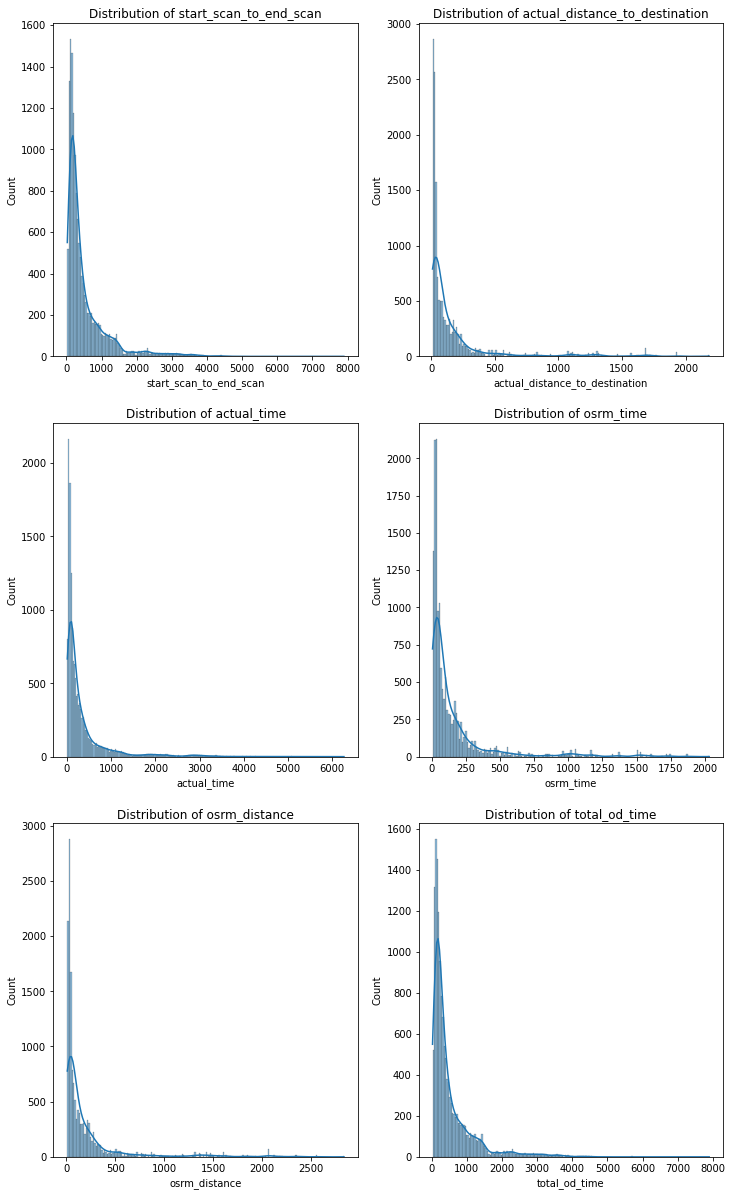

In [41]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.7)

sns.histplot(data=df3, x="start_scan_to_end_scan", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of start_scan_to_end_scan')
sns.histplot(data=df3, x="actual_distance_to_destination", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of actual_distance_to_destination')
sns.histplot(data=df3, x="actual_time", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of actual_time')
sns.histplot(data=df3, x="osrm_time", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of osrm_time')
sns.histplot(data=df3, x="osrm_distance", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of osrm_distance')
sns.histplot(data=df3, x="total_od_time", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of total_od_time')
plt.show()

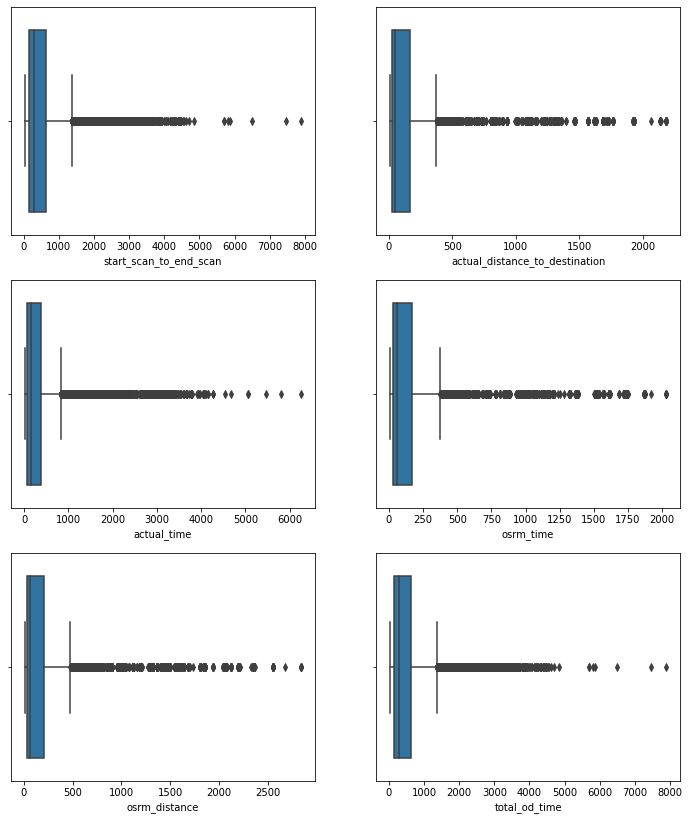

In [42]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="start_scan_to_end_scan", ax=axis[0,0])
sns.boxplot(data=df3, x="actual_distance_to_destination", ax=axis[0,1])
sns.boxplot(data=df3, x="actual_time", ax=axis[1,0])
sns.boxplot(data=df3, x="osrm_time", ax=axis[1,1])
sns.boxplot(data=df3, x="osrm_distance", ax=axis[2,0])
sns.boxplot(data=df3, x="total_od_time", ax=axis[2,1])
plt.show()

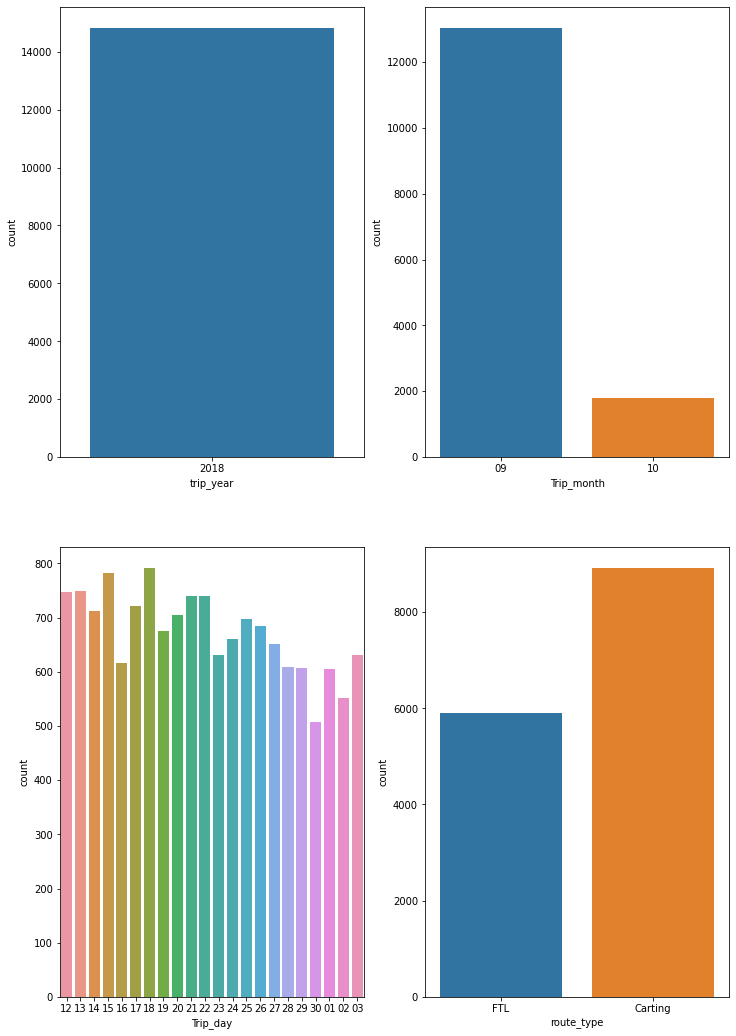

In [43]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.5)

sns.countplot(data=df3, x="trip_year", ax=axis[0,0])
sns.countplot(data=df3, x="Trip_month", ax=axis[0,1])
sns.countplot(data=df3, x="Trip_day", ax=axis[1,0])
sns.countplot(data=df3, x="route_type", ax=axis[1,1])
plt.show()

# Observations:

* Only Two types of route types are present(carting and FTL)
* Data is present only for one year (2018).
* Data is present only for two months (sept and oct).
* Few Distibutions are Right skewed. 
* Outliers are present in all numerical values.
* Remove of Outliers will be done later during Testing.

# Bivariate Analysis

<AxesSubplot:xlabel='route_type', ylabel='total_od_time'>

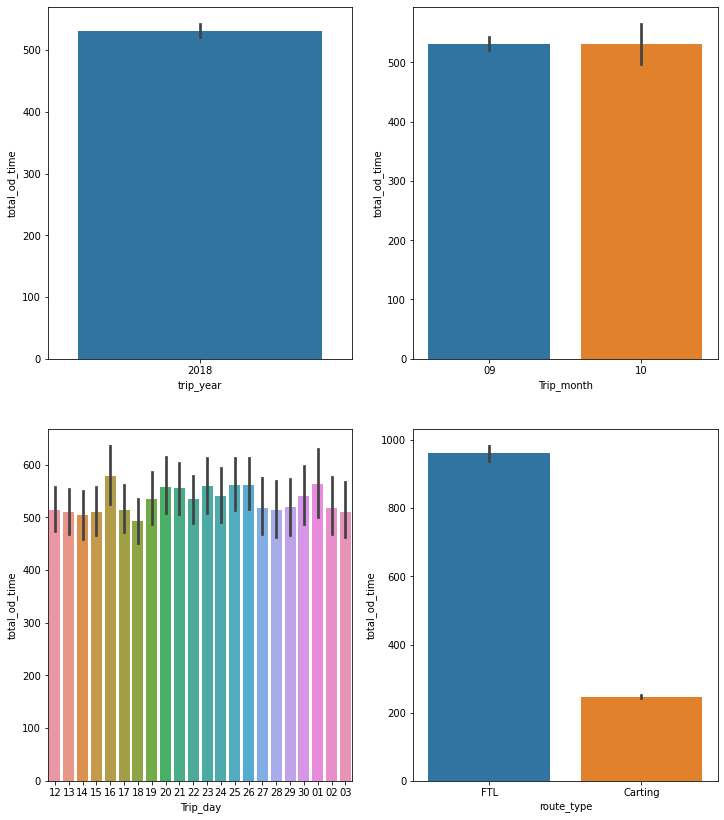

In [44]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='trip_year', y='total_od_time', data=df3, ax=axis[0,0])
sns.barplot(x='Trip_month', y='total_od_time', data=df3, ax=axis[0,1])
sns.barplot(x='Trip_day', y='total_od_time', data=df3, ax=axis[1,0])
sns.barplot(x='route_type', y='total_od_time', data=df3, ax=axis[1,1])

<AxesSubplot:xlabel='route_type', ylabel='total_od_time'>

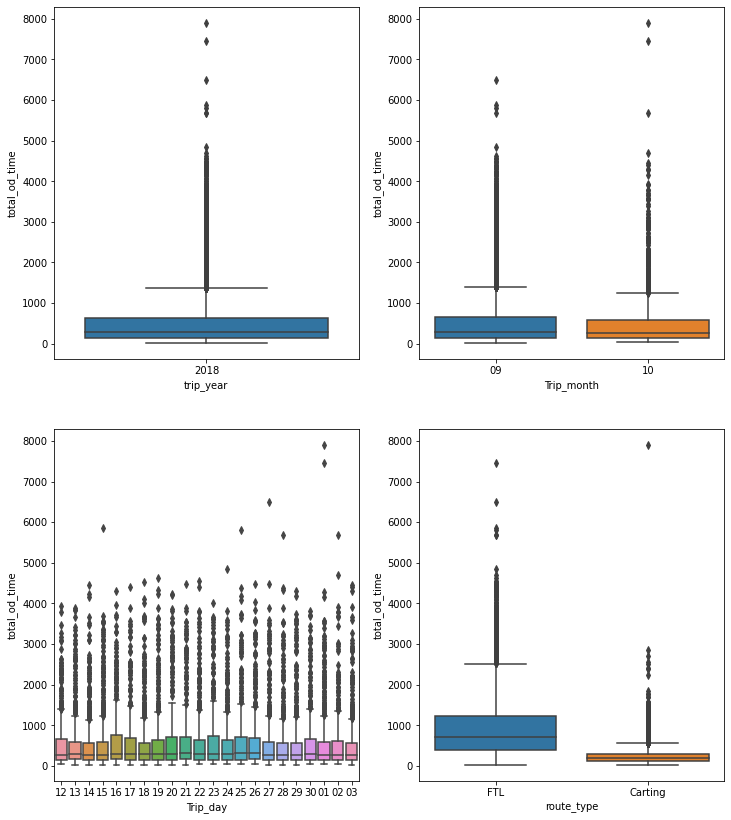

In [45]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='trip_year', y='total_od_time', data=df3, ax=axis[0,0])
sns.boxplot(x='Trip_month', y='total_od_time', data=df3, ax=axis[0,1])
sns.boxplot(x='Trip_day', y='total_od_time', data=df3, ax=axis[1,0])
sns.boxplot(x='route_type', y='total_od_time', data=df3, ax=axis[1,1])

<AxesSubplot:xlabel='route_type', ylabel='actual_distance_to_destination'>

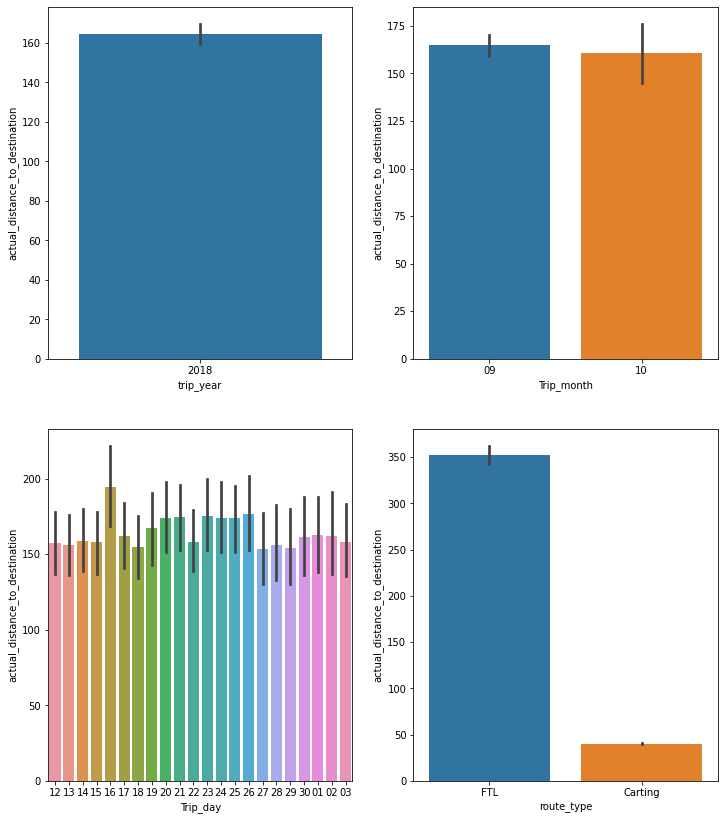

In [46]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='trip_year', y='actual_distance_to_destination', data=df3, ax=axis[0,0])
sns.barplot(x='Trip_month', y='actual_distance_to_destination', data=df3, ax=axis[0,1])
sns.barplot(x='Trip_day', y='actual_distance_to_destination', data=df3, ax=axis[1,0])
sns.barplot(x='route_type', y='actual_distance_to_destination', data=df3, ax=axis[1,1])

<AxesSubplot:xlabel='route_type', ylabel='actual_distance_to_destination'>

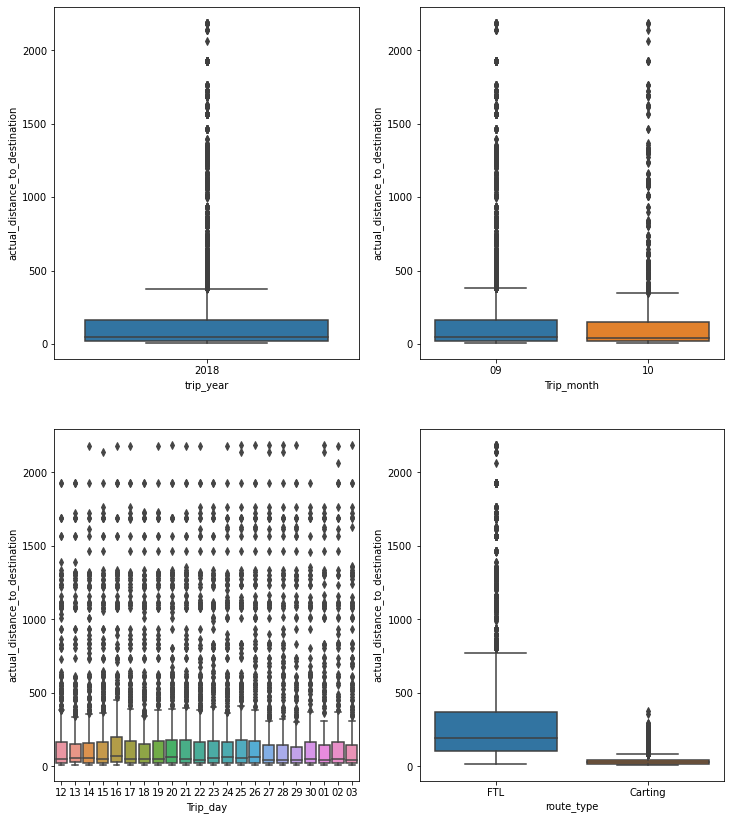

In [47]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='trip_year', y='actual_distance_to_destination', data=df3, ax=axis[0,0])
sns.boxplot(x='Trip_month', y='actual_distance_to_destination', data=df3, ax=axis[0,1])
sns.boxplot(x='Trip_day', y='actual_distance_to_destination', data=df3, ax=axis[1,0])
sns.boxplot(x='route_type', y='actual_distance_to_destination', data=df3, ax=axis[1,1])

<AxesSubplot:xlabel='route_type', ylabel='osrm_distance'>

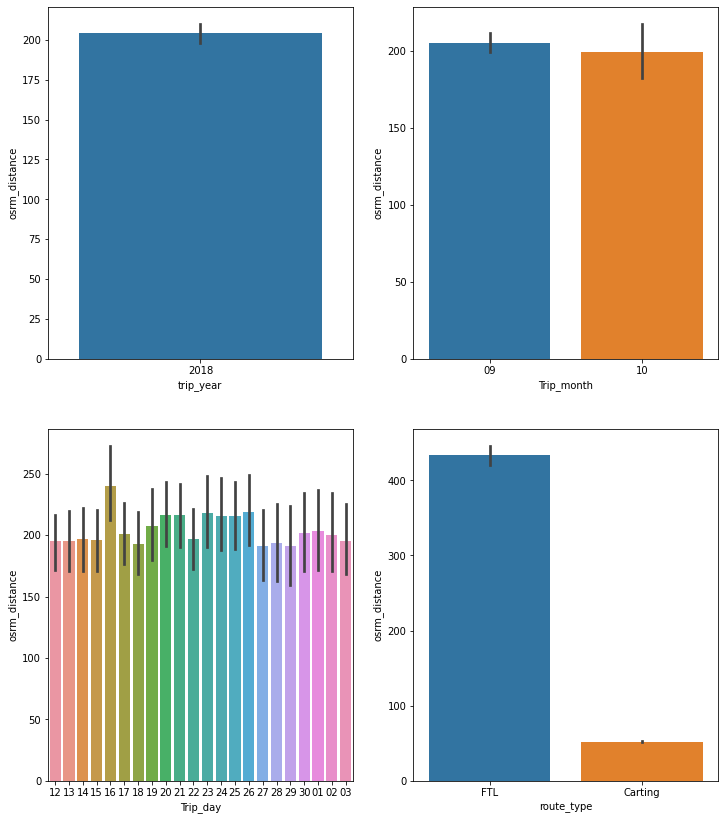

In [48]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='trip_year', y='osrm_distance', data=df3, ax=axis[0,0])
sns.barplot(x='Trip_month', y='osrm_distance', data=df3, ax=axis[0,1])
sns.barplot(x='Trip_day', y='osrm_distance', data=df3, ax=axis[1,0])
sns.barplot(x='route_type', y='osrm_distance', data=df3, ax=axis[1,1])

<AxesSubplot:xlabel='route_type', ylabel='osrm_distance'>

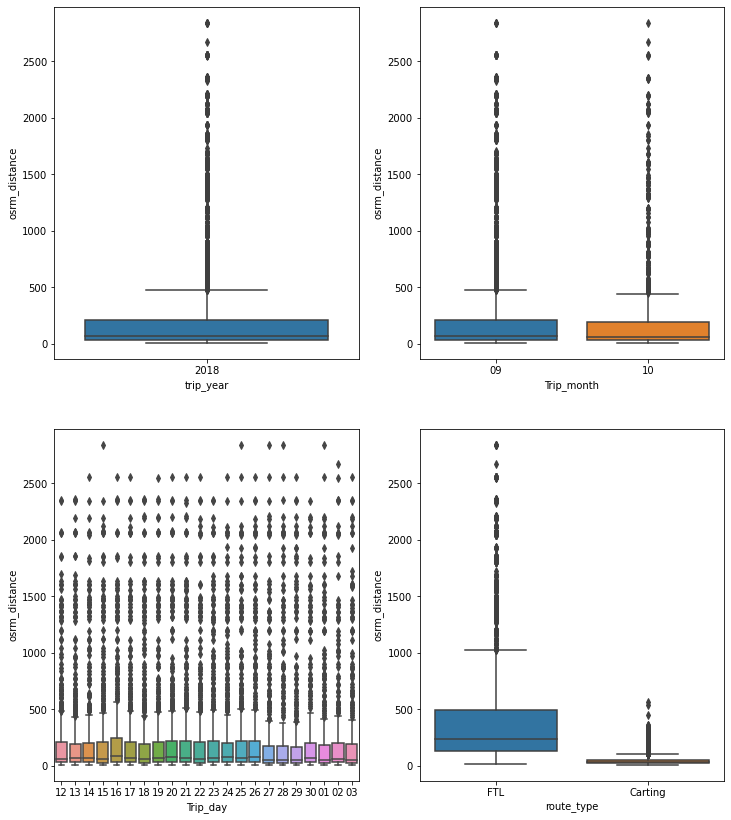

In [49]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='trip_year', y='osrm_distance', data=df3, ax=axis[0,0])
sns.boxplot(x='Trip_month', y='osrm_distance', data=df3, ax=axis[0,1])
sns.boxplot(x='Trip_day', y='osrm_distance', data=df3, ax=axis[1,0])
sns.boxplot(x='route_type', y='osrm_distance', data=df3, ax=axis[1,1])

# Observations:

* Similar mean of distance is covered on both the months based on plots.
* Compared to Carting , FTL took more average time in distance and time aspects.
* Similar mean distance and time taken on almost all days present in data.
* outliers are present in almost most of data but for now we won't remove them.
* plotted all combination of bivariate variables but can't confirm particular insights.
* further Hypothesis testing is done on these numerical variables regarding relationship betweem them.

# Multivariate Analysis

In [50]:
## correlation matrix for heat map
df.corr()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_od_time
start_scan_to_end_scan,1.000000,0.785006,0.785937,0.785298,0.784138,0.093301,0.219848,0.306983,1.000000
actual_distance_to_destination,0.785006,1.000000,0.978659,0.995872,0.997149,0.045241,0.158832,0.232119,0.785005
actual_time,0.785937,0.978659,1.000000,0.977998,0.979399,0.124411,0.171465,0.242282,0.785936
osrm_time,0.785298,0.995872,0.977998,1.000000,0.999119,0.049892,0.177066,0.242282,0.785298
osrm_distance,0.784138,0.997149,0.979399,0.999119,1.000000,0.048705,0.169151,0.239669,0.784137
segment_actual_time,0.093301,0.045241,0.124411,0.049892,0.048705,1.000000,0.433422,0.448959,0.093302
segment_osrm_time,0.219848,0.158832,0.171465,0.177066,0.169151,0.433422,1.000000,0.948523,0.219846
segment_osrm_distance,0.306983,0.232119,0.242282,0.242282,0.239669,0.448959,0.948523,1.000000,0.306980
total_od_time,1.000000,0.785005,0.785936,0.785298,0.784137,0.093302,0.219846,0.306980,1.000000


<AxesSubplot:>

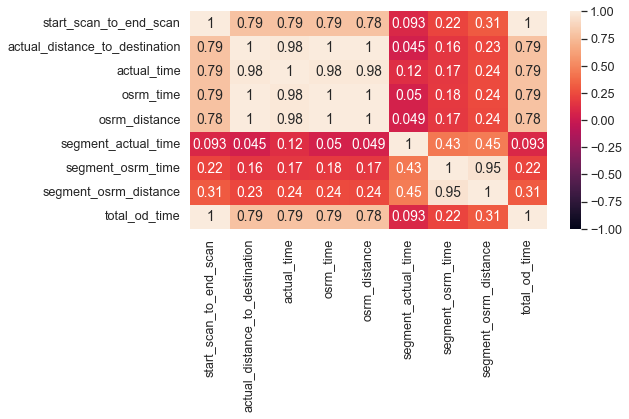

In [51]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),         
    annot=True, 
    vmin=-1, vmax=1)

In [52]:
## spearman correlation matrix for heat map for better understanding 
df.corr('spearman')

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_od_time
start_scan_to_end_scan,1.000000,0.823468,0.826336,0.818419,0.825554,0.348503,0.426410,0.535446,0.999999
actual_distance_to_destination,0.823468,1.000000,0.950443,0.980596,0.991110,0.276712,0.387241,0.500671,0.823462
actual_time,0.826336,0.950443,1.000000,0.955790,0.958667,0.363215,0.370396,0.471529,0.826333
osrm_time,0.818419,0.980596,0.955790,1.000000,0.991722,0.288490,0.426160,0.509474,0.818415
osrm_distance,0.825554,0.991110,0.958667,0.991722,1.000000,0.293872,0.412470,0.521266,0.825549
segment_actual_time,0.348503,0.276712,0.363215,0.288490,0.293872,1.000000,0.653203,0.665464,0.348500
segment_osrm_time,0.426410,0.387241,0.370396,0.426160,0.412470,0.653203,1.000000,0.923206,0.426401
segment_osrm_distance,0.535446,0.500671,0.471529,0.509474,0.521266,0.665464,0.923206,1.000000,0.535435
total_od_time,0.999999,0.823462,0.826333,0.818415,0.825549,0.348500,0.426401,0.535435,1.000000


<AxesSubplot:>

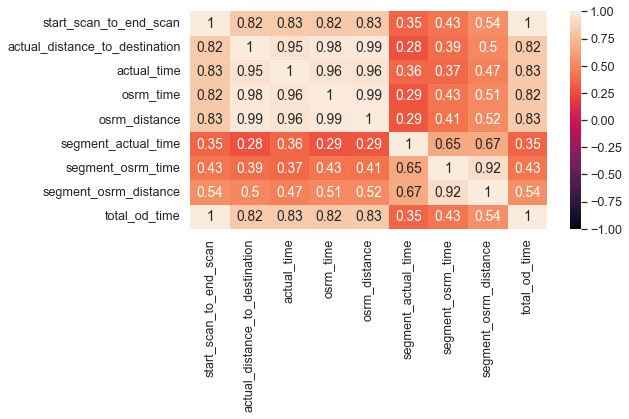

In [53]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr('spearman'),         
    annot=True, 
    vmin=-1, vmax=1)

# Observations:

* total_time taken and total distance is highly correlated according to heatmap.
* actual_time taken and total distance is also highly correlated according to heatmap.
* total_time taken and osrm distance and osrm time is also highly correlated according to plot.
* osrm time taken and osrm distance are highly correlated like 99% according to plot.
* segment time and segment distance is not much correlated to any other variables.

In [ ]:
sns.pointplot(x=df3['actual_time'], y=df3['actual_distance_to_destination'], hue=df3['Trip_month'])

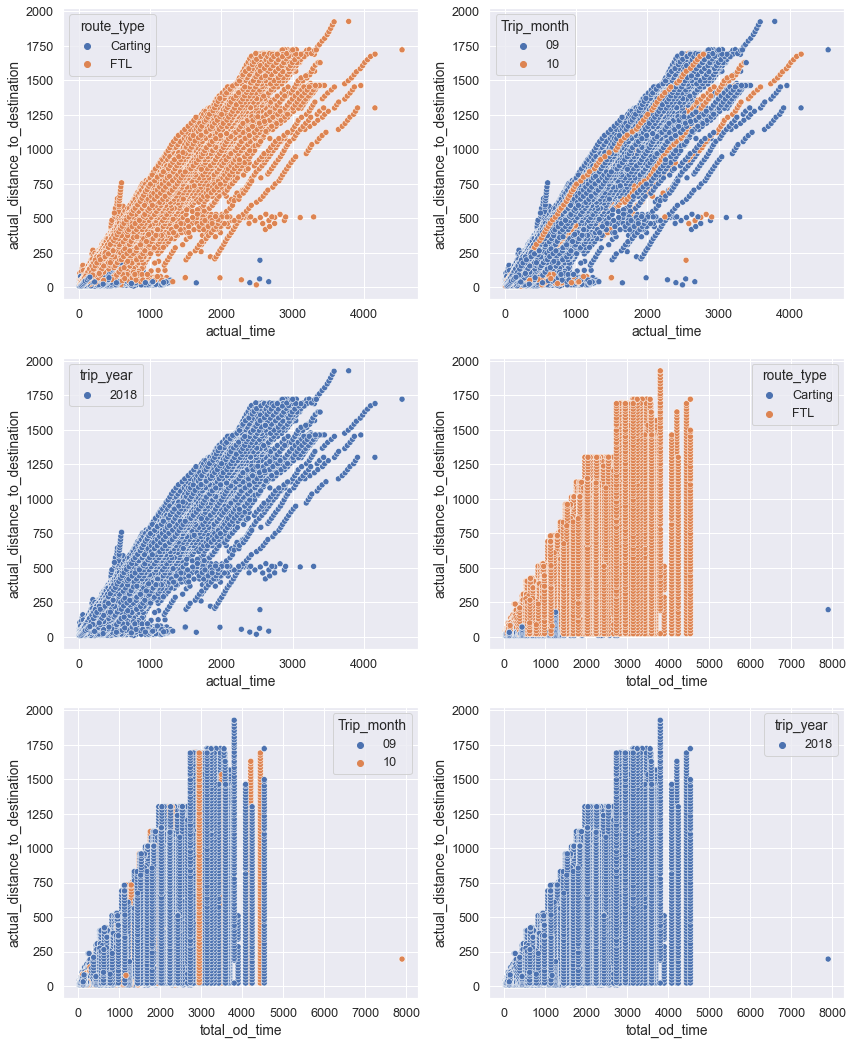

In [59]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)

sns.scatterplot(x=df['actual_time'], y=df['actual_distance_to_destination'], hue=df['route_type'],ax=axis[0,0])
sns.scatterplot(x=df['actual_time'], y=df['actual_distance_to_destination'], hue=df['Trip_month'],ax=axis[0,1])
sns.scatterplot(x=df['actual_time'], y=df['actual_distance_to_destination'], hue=df['trip_year'],ax=axis[1,0])
sns.scatterplot(x=df['total_od_time'], y=df['actual_distance_to_destination'], hue=df['route_type'],ax=axis[1,1])
sns.scatterplot(x=df['total_od_time'], y=df['actual_distance_to_destination'], hue=df['Trip_month'],ax=axis[2,0])
sns.scatterplot(x=df['total_od_time'], y=df['actual_distance_to_destination'], hue=df['trip_year'],ax=axis[2,1])
plt.show()

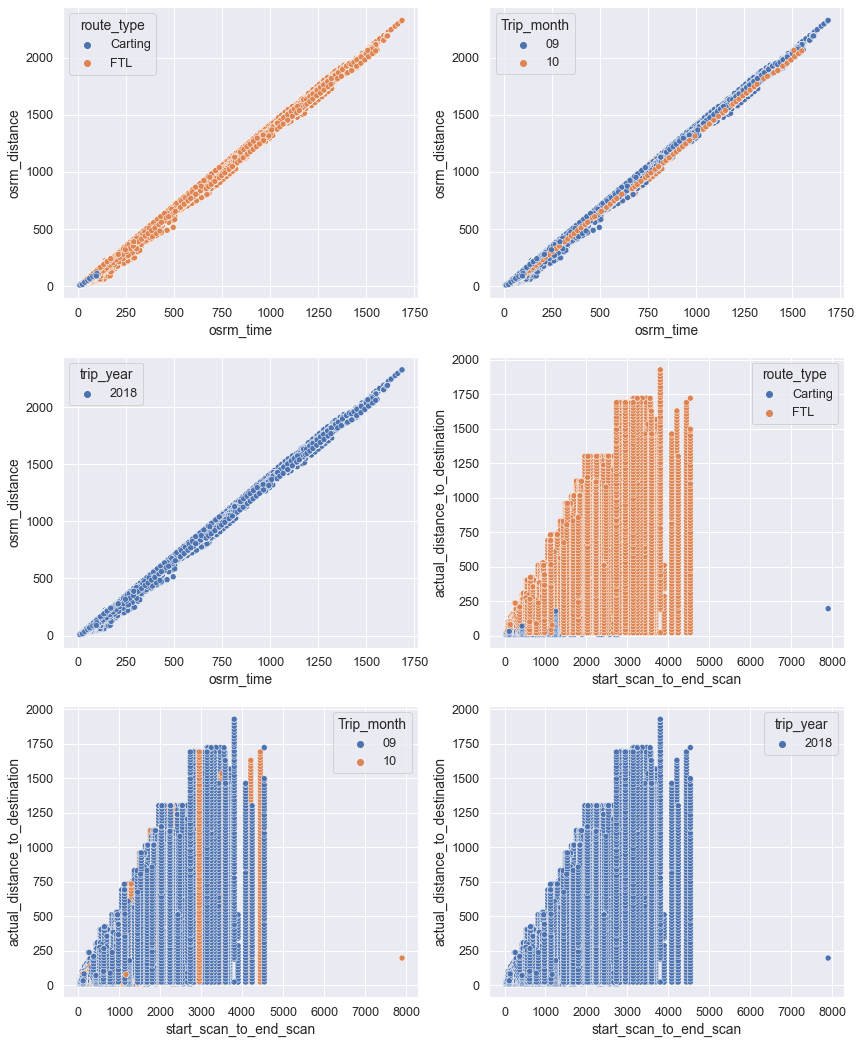

In [60]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)

sns.scatterplot(x=df['osrm_time'], y=df['osrm_distance'], hue=df['route_type'],ax=axis[0,0])
sns.scatterplot(x=df['osrm_time'], y=df['osrm_distance'], hue=df['Trip_month'],ax=axis[0,1])
sns.scatterplot(x=df['osrm_time'], y=df['osrm_distance'], hue=df['trip_year'],ax=axis[1,0])
sns.scatterplot(x=df['start_scan_to_end_scan'], y=df['actual_distance_to_destination'], hue=df['route_type'],ax=axis[1,1])
sns.scatterplot(x=df['start_scan_to_end_scan'], y=df['actual_distance_to_destination'], hue=df['Trip_month'],ax=axis[2,0])
sns.scatterplot(x=df['start_scan_to_end_scan'], y=df['actual_distance_to_destination'], hue=df['trip_year'],ax=axis[2,1])
plt.show()

# one-hot encoding

In [61]:
# applying one hot encoding on route_type

In [72]:
one_hot_encoded_data = pd.get_dummies(df3, columns = ['route_type'])
one_hot_encoded_data

,trip_uuid,actual_distance_to_destination,actual_time,osrm_distance,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,total_od_time,Source_City,Source_State,Dest_City,Dest_State,trip_year,Trip_month,Trip_day,route_type_Carting,route_type_FTL
0,trip-153671041653548748,824.732854,1562.0,991.3523,717.0,1548.0,1008.0,1320.4733,2259.0,2260.11,Kanpur_Central_H_6,Uttar Pradesh,Gurgaon_Bilaspur_HB,Haryana,2018,09,12,0,1
1,trip-153671042288605164,73.186911,143.0,85.1110,68.0,141.0,65.0,84.1894,180.0,181.61,Doddablpur_ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Karnataka,2018,09,12,1,0
2,trip-153671043369099517,1927.404273,3347.0,2354.0665,1740.0,3308.0,1941.0,2545.2678,3933.0,3934.36,Gurgaon_Bilaspur_HB,Haryana,Chandigarh_Mehmdpur_H,Punjab,2018,09,12,0,1
3,trip-153671046011330457,17.175274,59.0,19.6800,15.0,59.0,16.0,19.8766,100.0,100.49,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,Maharashtra,2018,09,12,1,0
4,trip-153671052974046625,127.448500,341.0,146.7918,117.0,340.0,115.0,146.7919,717.0,718.34,Bellary_Dc,Karnataka,Hospet,Karnataka,2018,09,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,57.762332,83.0,73.4630,62.0,82.0,62.0,64.8551,257.0,258.03,Chandigarh_Mehmdpur_H,Punjab,Zirakpur_DC,Punjab,2018,10,03,1,0
14813,trip-153861104386292051,15.513784,21.0,16.0882,12.0,21.0,11.0,16.0883,60.0,60.59,FBD_Balabhgarh_DPC,Haryana,Faridabad_Blbgarh_DC,Haryana,2018,10,03,1,0
14814,trip-153861106442901555,38.684839,282.0,58.9037,48.0,281.0,88.0,104.8866,421.0,422.12,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur_Central_H_6,Uttar Pradesh,2018,10,03,1,0
14815,trip-153861115439069069,134.723836,264.0,171.1103,179.0,258.0,221.0,223.5324,347.0,348.52,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Eral_Busstand_D,Tamil Nadu,2018,10,03,1,0


In [74]:
one_hot_encoded_data['route_type_Carting']

0        0
1        1
2        0
3        1
4        0
        ..
14812    1
14813    1
14814    1
14815    1
14816    0
Name: route_type_Carting, Length: 14817, dtype: uint8

# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

# MinMaxScaler

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled= scaler.fit_transform(df3[['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance'
,'segment_actual_time','segment_osrm_time','segment_osrm_distance','total_od_time']])

df_scaled = pd.DataFrame(df_scaled, columns=['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance'
,'segment_actual_time','segment_osrm_time','segment_osrm_distance','total_od_time'])


print("Scaled Dataset Using MinMaxScaler")
df_scaled

Scaled Dataset Using MinMaxScaler


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_od_time
0,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.284016
1,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.020082
2,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.496617
3,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.009781
4,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.088238
...,...,...,...,...,...,...,...,...,...
14812,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872,0.029786
14813,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996,0.004715
14814,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262,0.050623
14815,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020,0.041277


# StandardScaler

In [88]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled_standard= std_scaler.fit_transform(df3[['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance'
,'segment_actual_time','segment_osrm_time','segment_osrm_distance','total_od_time']])

df_scaled_standard = pd.DataFrame(df_scaled_standard, columns=['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance'
,'segment_actual_time','segment_osrm_time','segment_osrm_distance','total_od_time'])

print("Scaled Dataset Using StandardScaler")
df_scaled_standard

Scaled Dataset Using StandardScaler


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_od_time
0,2.623961,2.162092,2.146251,2.047585,2.124848,2.146791,2.629468,2.633784,2.623652
1,-0.532591,-0.298944,-0.381461,-0.344144,-0.321920,-0.382742,-0.368643,-0.333670,-0.531363
2,5.165600,5.772935,5.325931,5.817598,5.804050,5.310954,5.595785,5.573660,5.165044
3,-0.654055,-0.482362,-0.531093,-0.539462,-0.498578,-0.530163,-0.524430,-0.488040,-0.654498
4,0.282738,-0.121257,-0.028757,-0.163566,-0.155387,-0.024976,-0.209676,-0.183405,0.283355
...,...,...,...,...,...,...,...,...,...
14812,-0.415682,-0.349454,-0.488341,-0.366255,-0.353368,-0.488813,-0.378181,-0.380078,-0.415363
14813,-0.714787,-0.487802,-0.598784,-0.550518,-0.508275,-0.598480,-0.540327,-0.497133,-0.715063
14814,-0.166680,-0.411926,-0.133856,-0.417849,-0.392677,-0.131047,-0.295518,-0.283991,-0.166286
14815,-0.279034,-0.097433,-0.165920,0.064919,-0.089730,-0.172397,0.127333,0.000795,-0.278006


# Hypothesis Testing

# 1.Compare the difference between total_od_time and start_scan_to_end_scan. 

# Paired T Test is used for finding difference between them


Step 1: Define Null & Alternate Hypothesis

*  H0 : difference between total_od_time and start_scan_to_end_scan is zero.
*  Ha : difference between total_od_time and start_scan_to_end_scan is not zero.
*  alpha = 0.05


Step 2: Validate the assumptions

    • The dependent variable must be continuous (interval/ratio).
    • The observations are independent of one another.
    • The dependent variable should be approximately normally distributed.
    • The dependent variable should not contain any outliers.
    


Checking assumptions of the test (Normality,and outliers)

In [92]:
total_time_data = df3['total_od_time'].sample(4000)
start_end_data = df3['start_scan_to_end_scan'] .sample(4000)

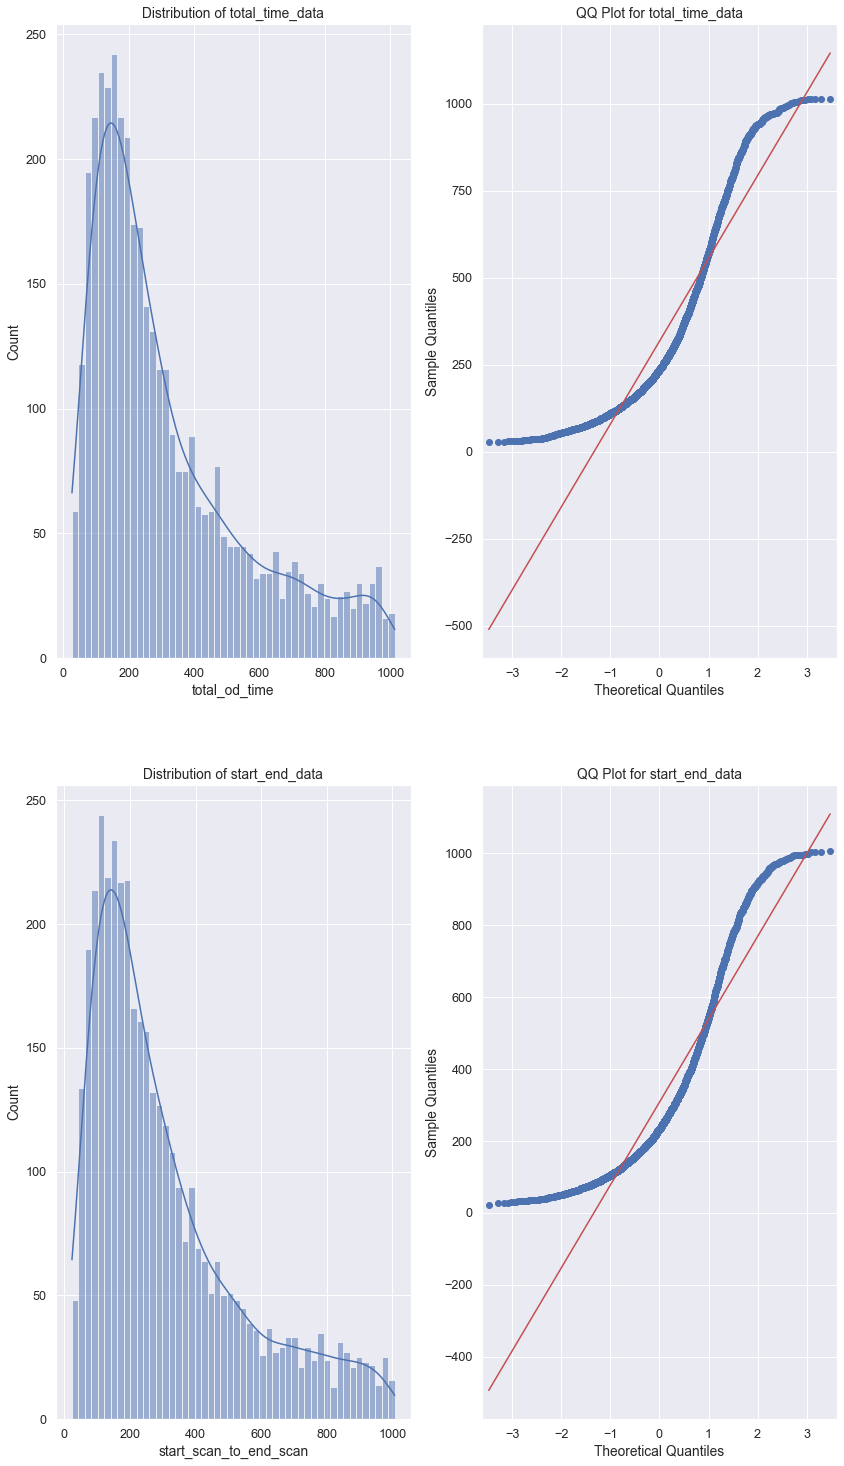

In [197]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# total_time_data
sns.histplot(data=total_time_data,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of total_time_data')
sm.qqplot(total_time_data, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for total_time_data')

# start_end_data
sns.histplot(data=start_end_data,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of start_end_data')
sm.qqplot(start_end_data, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for start_end_data')


plt.show()

# shapiro wilk test to test whether it belongs to normal distribution or not

In [100]:
stats.shapiro(total_time_data.sample(4000))

ShapiroResult(statistic=0.6522393226623535, pvalue=0.0)

In [101]:
stats.shapiro(start_end_data.sample(4000))

ShapiroResult(statistic=0.6695610880851746, pvalue=0.0)

In [102]:
#Box plot for detecting outliers

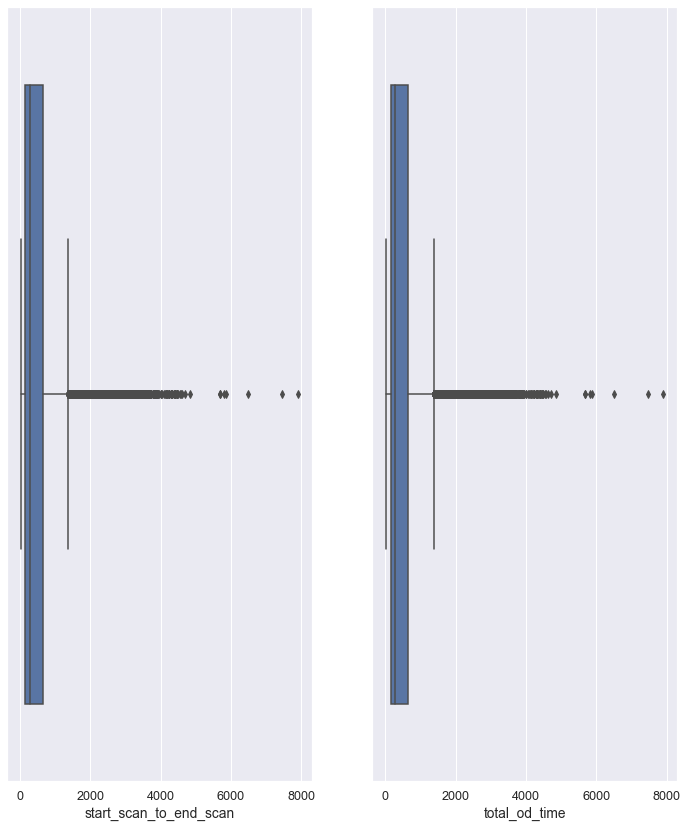

In [104]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="start_scan_to_end_scan", ax=axis[0])
sns.boxplot(data=df3, x="total_od_time", ax=axis[1])
plt.show()

In [105]:
q1=df3['start_scan_to_end_scan'].quantile(0.25)
q3=df3['start_scan_to_end_scan'].quantile(0.75)
iqr=q3-q1

In [111]:
df3=df3[(df3['start_scan_to_end_scan']<=q3+2*iqr) & (df3['start_scan_to_end_scan']>=q1-2*iqr)]

In [108]:
q1=df3['total_od_time'].quantile(0.25)
q3=df3['total_od_time'].quantile(0.75)
iqr=q3-q1

In [112]:
df3=df3[(df3['total_od_time']<=q3+2*iqr) & (df3['total_od_time']>=q1-2*iqr)]

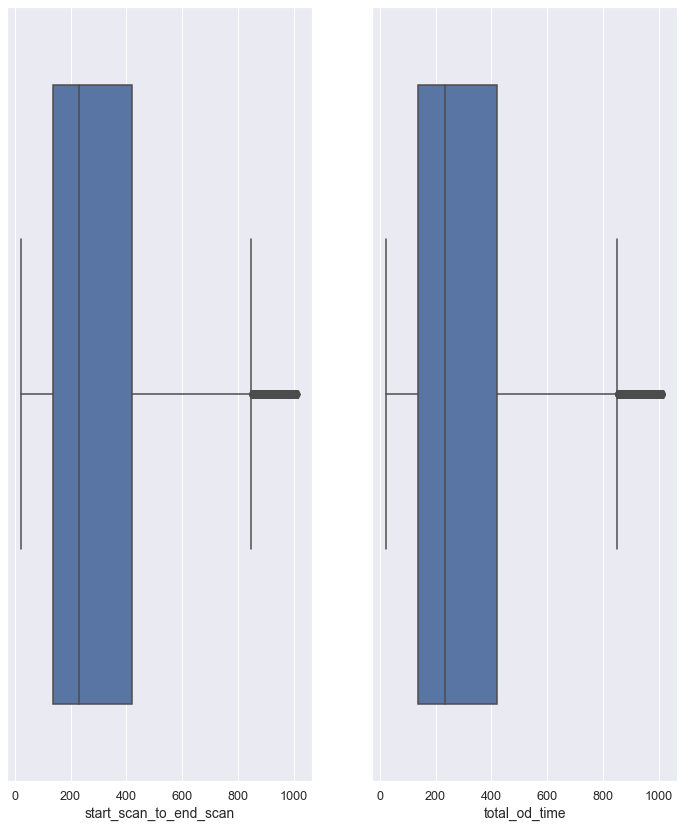

In [113]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="start_scan_to_end_scan", ax=axis[0])
sns.boxplot(data=df3, x="total_od_time", ax=axis[1])
plt.show()

In [114]:
total_time_data = df3['total_od_time'].sample(4000)
start_end_data = df3['start_scan_to_end_scan'] .sample(4000)

# Observations:

* According Shapiro wilk test we can conclude that they come from normal distribution.
* By Box plot found outliers and removed them.
* now we are ready to perform Test.

# Testing

In [115]:
t_test, p_value = stats.ttest_rel(total_time_data,start_end_data)
t_test, p_value

(1.7780841990737486, 0.07546599276862039)

In [116]:
def HTResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [117]:
HTResult(p_value)

Fail to Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value > alpha(0.05) , we fail to reject H0 
2. Thus we can say that there is no difference between total_od_time and start_scan_to_end_scan.

# 2. Do hypothesis testing between actual_time aggregated value and OSRM time aggregated value

# Paired T Test is used for finding difference between actual_time aggregated value and OSRM time aggregated value


Step 1: Define Null & Alternate Hypothesis

*  H0 : difference between actual_time aggregated  and OSRM time aggregated  is zero.
*  Ha : difference between actual_time aggregated  and OSRM time aggregated  is not zero.
*  alpha = 0.05


Step 2: Validate the assumptions

    • The dependent variable must be continuous (interval/ratio).
    • The observations are independent of one another.
    • The dependent variable should be approximately normally distributed.
    • The dependent variable should not contain any outliers.
    


Checking assumptions of the test (Normality,and outliers)

In [122]:
actual_time_data = df3['actual_time'].sample(4000)
orsm_time_data = df3['osrm_time'] .sample(4000)

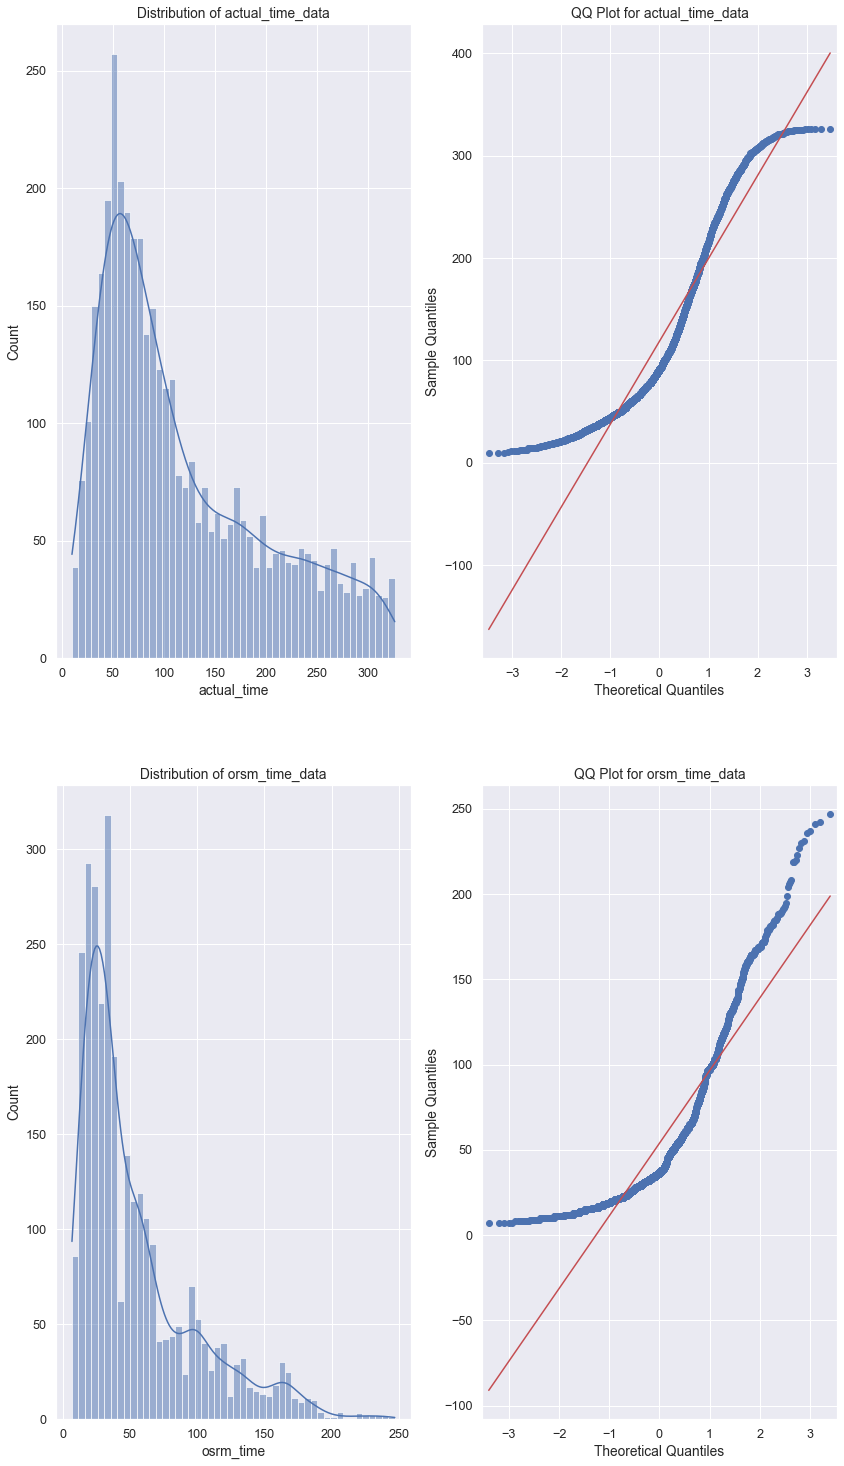

In [198]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# actual_time_data
sns.histplot(data=actual_time_data,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of actual_time_data')
sm.qqplot(actual_time_data, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for actual_time_data')

# orsm_time_data
sns.histplot(data=orsm_time_data,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of orsm_time_data')
sm.qqplot(orsm_time_data, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for orsm_time_data')


plt.show()

In [123]:
# doing shapiro wilk test to test normality

In [124]:
stats.shapiro(actual_time_data)

ShapiroResult(statistic=0.8207839131355286, pvalue=0.0)

In [125]:
stats.shapiro(orsm_time_data)

ShapiroResult(statistic=0.7881249189376831, pvalue=0.0)

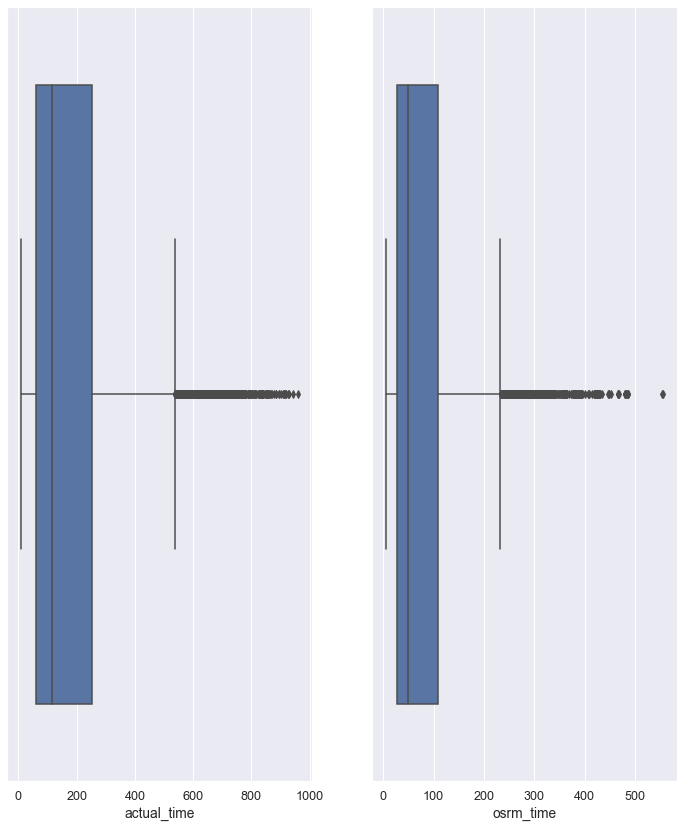

In [127]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="actual_time", ax=axis[0])
sns.boxplot(data=df3, x="osrm_time", ax=axis[1])
plt.show()

In [128]:
q1=df3['actual_time'].quantile(0.25)
q3=df3['actual_time'].quantile(0.75)
iqr=q3-q1

In [133]:
df3=df3[(df3['actual_time']<=q3+3*iqr) & (df3['actual_time']>=q1-3*iqr)]

In [130]:
q1=df3['osrm_time'].quantile(0.25)
q3=df3['osrm_time'].quantile(0.75)
iqr=q3-q1

In [138]:
df3=df3[(df3['osrm_time']<=q3+3*iqr) & (df3['osrm_time']>=q1-3*iqr)]

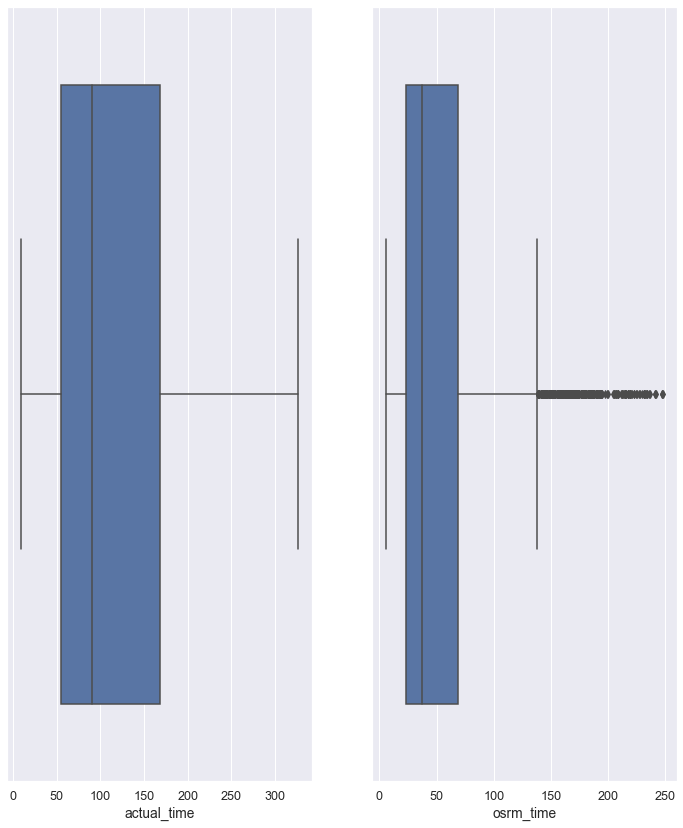

In [139]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="actual_time", ax=axis[0])
sns.boxplot(data=df3, x="osrm_time", ax=axis[1])
plt.show()

In [142]:
actual_time_data = df3['actual_time'].sample(3000)
orsm_time_data = df3['osrm_time'] .sample(3000)

# Observations:

* According Shapiro wilk test we can conclude that they come from normal distribution.
* By Box plot found outliers and removed them.
* now we are ready to perform Test.

# testing

In [143]:
t_test, p_value = stats.ttest_rel(actual_time_data,orsm_time_data)
t_test, p_value

(38.88476758508359, 3.4750622973757415e-268)

In [144]:
HTResult(p_value)

Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value < alpha(0.05) , we  reject H0 
2. Thus we can say that there is difference between actual_time and osrm_time.

# 3. Do hypothesis testing between actual_time aggregated value and segment actual time aggregated value

# Paired T Test is used for finding difference between actual_time aggregated value and segment actual time aggregated value


Step 1: Define Null & Alternate Hypothesis

*  H0 : difference between actual_time aggregated  and segment actual time aggregated  is zero.
*  Ha : difference between actual_time aggregated  and segment actual time aggregated  is not zero.
*  alpha = 0.05


Step 2: Validate the assumptions

    • The dependent variable must be continuous (interval/ratio).
    • The observations are independent of one another.
    • The dependent variable should be approximately normally distributed.
    • The dependent variable should not contain any outliers.
    


Checking assumptions of the test (Normality,and outliers)

In [147]:
actual_time_data = df3['actual_time'].sample(4000)
segment_time_data = df3['segment_actual_time'] .sample(4000)

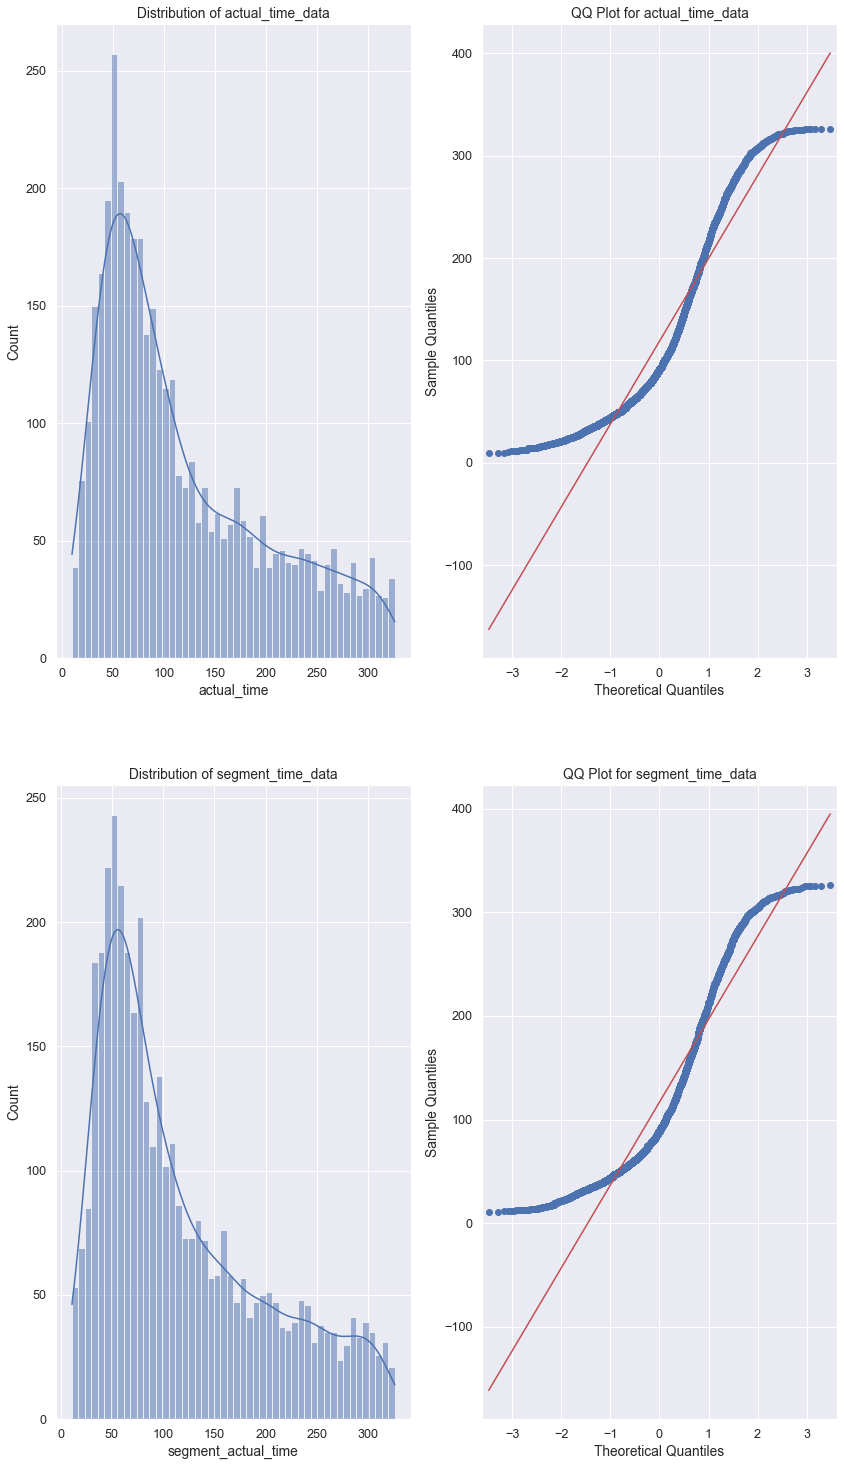

In [195]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# actual_time_data
sns.histplot(data=actual_time_data,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of actual_time_data')
sm.qqplot(actual_time_data, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for actual_time_data')

# segment_time_data
sns.histplot(data=segment_time_data,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of segment_time_data')
sm.qqplot(segment_time_data, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for segment_time_data')


plt.show()

In [148]:
# doing shapiro wilk test to test normality

In [149]:
stats.shapiro(actual_time_data)

ShapiroResult(statistic=0.8957580327987671, pvalue=0.0)

In [150]:
stats.shapiro(segment_time_data)

ShapiroResult(statistic=0.8911569118499756, pvalue=0.0)

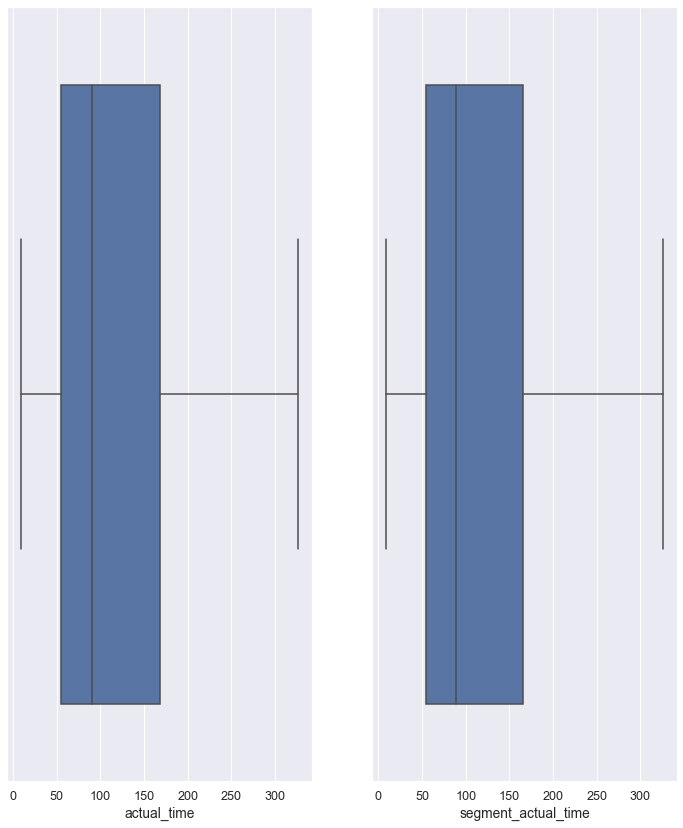

In [151]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="actual_time", ax=axis[0])
sns.boxplot(data=df3, x="segment_actual_time", ax=axis[1])
plt.show()

# Observations:

* According Shapiro wilk test we can conclude that they come from normal distribution.
* By Box plot found outliers and removed them.
* now we are ready to perform Test.

# Testing

In [152]:
t_test, p_value = stats.ttest_rel(actual_time_data,segment_time_data)
t_test, p_value

(1.088092689721958, 0.2766197624457328)

In [153]:
HTResult(p_value)

Fail to Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value > alpha(0.05) , we fail to reject H0 
2. Thus we can say that there is no difference between actual_time and segment_actual_time.

# 4. Do hypothesis testing between osrm distance aggregated value and segment osrm distance aggregated value

# Paired T Test is used for finding difference between osrm distance aggregated value and segment osrm distance aggregated value


Step 1: Define Null & Alternate Hypothesis

*  H0 : difference between osrm distance aggregated value  and segment osrm distance aggregated value  is zero.
*  Ha : difference between osrm distance aggregated value  and segment osrm distance aggregated value is not zero.
*  alpha = 0.05


Step 2: Validate the assumptions

    • The dependent variable must be continuous (interval/ratio).
    • The observations are independent of one another.
    • The dependent variable should be approximately normally distributed.
    • The dependent variable should not contain any outliers.
    

In [171]:
osrm_distance_data = df3['osrm_distance'].sample(5000)
segment_osrm_data = df3['segment_osrm_distance'] .sample(5000)

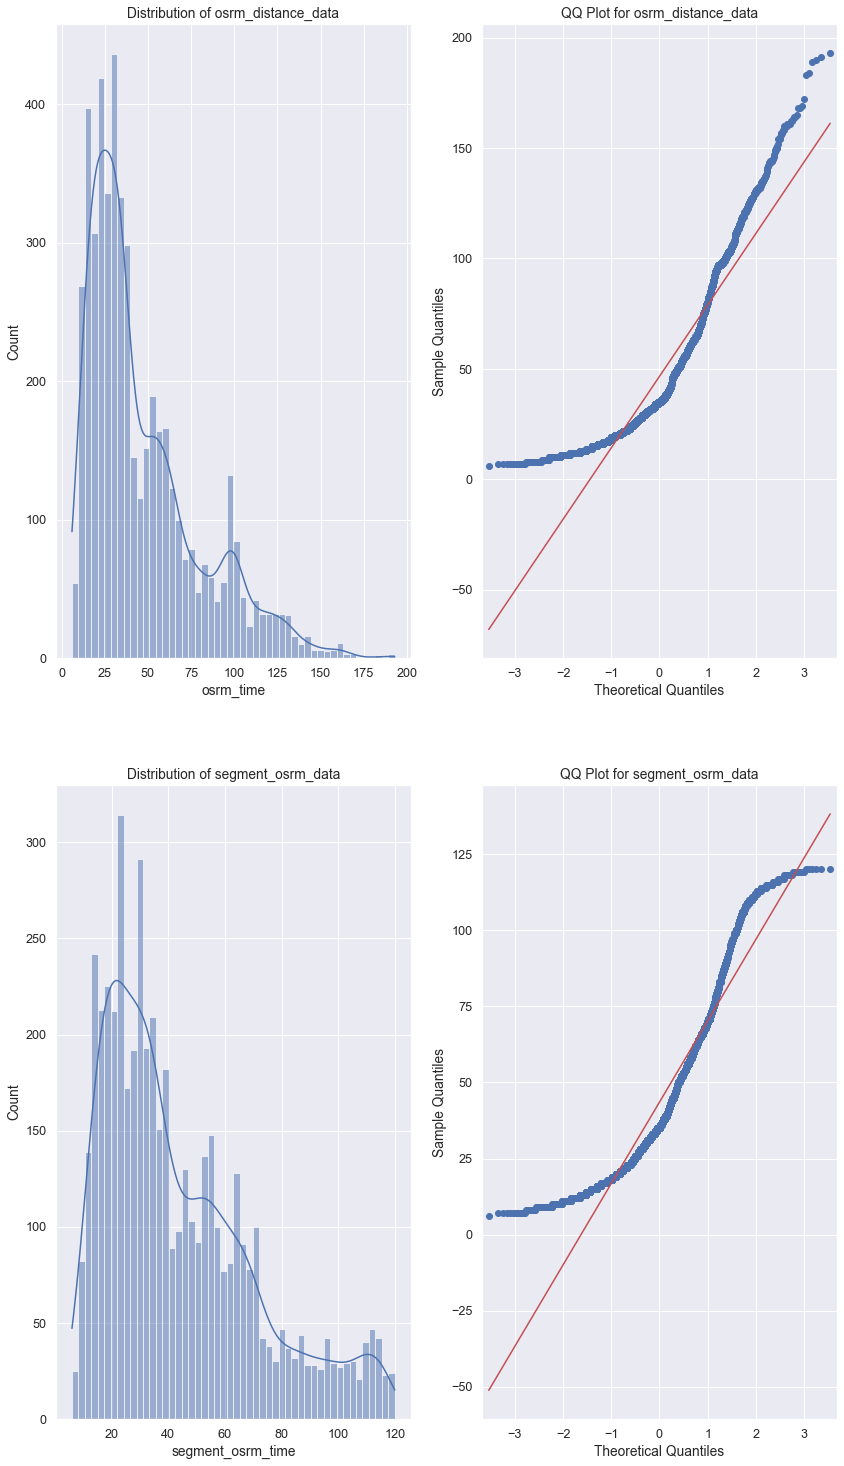

In [194]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# osrm_distance_data
sns.histplot(data=osrm_distance_data,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of osrm_distance_data')
sm.qqplot(osrm_distance_data, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for osrm_distance_data')

# segment_osrm_data
sns.histplot(data=segment_osrm_data,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of segment_osrm_data')
sm.qqplot(segment_osrm_data, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for segment_osrm_data')


plt.show()

In [159]:
# doing shapiro wilk test to test normality

In [160]:
stats.shapiro(osrm_distance_data)

ShapiroResult(statistic=0.8052767515182495, pvalue=0.0)

In [161]:
stats.shapiro(segment_osrm_data)

ShapiroResult(statistic=0.8101359009742737, pvalue=0.0)

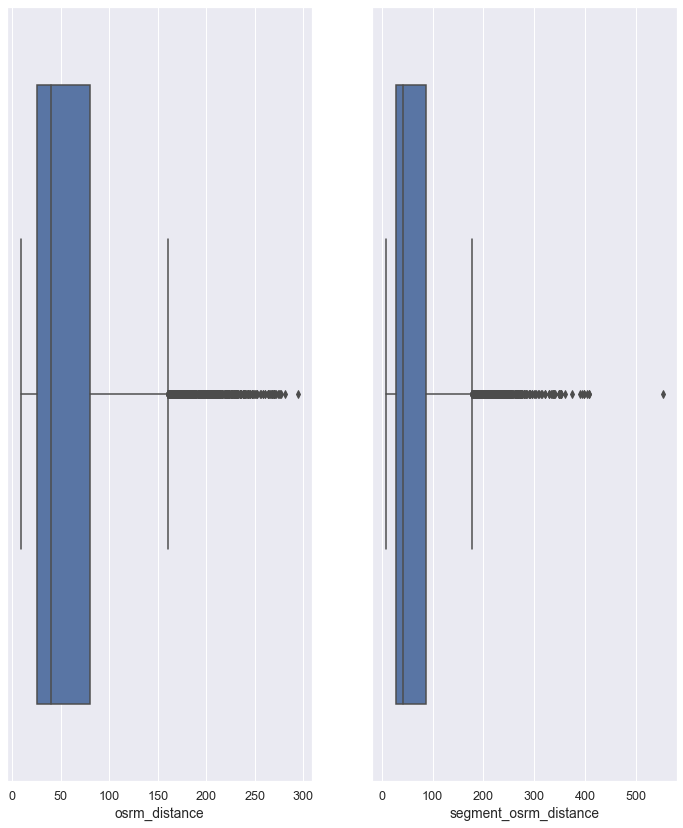

In [162]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="osrm_distance", ax=axis[0])
sns.boxplot(data=df3, x="segment_osrm_distance", ax=axis[1])
plt.show()

In [163]:
q1=df3['osrm_distance'].quantile(0.25)
q3=df3['osrm_distance'].quantile(0.75)
iqr=q3-q1

In [168]:
df3=df3[(df3['osrm_distance']<=q3+1.5*iqr) & (df3['osrm_distance']>=q1-1.5*iqr)]

In [165]:
q1=df3['segment_osrm_distance'].quantile(0.25)
q3=df3['segment_osrm_distance'].quantile(0.75)
iqr=q3-q1

In [169]:
df3=df3[(df3['segment_osrm_distance']<=q3+1.5*iqr) & (df3['segment_osrm_distance']>=q1-1.5*iqr)]

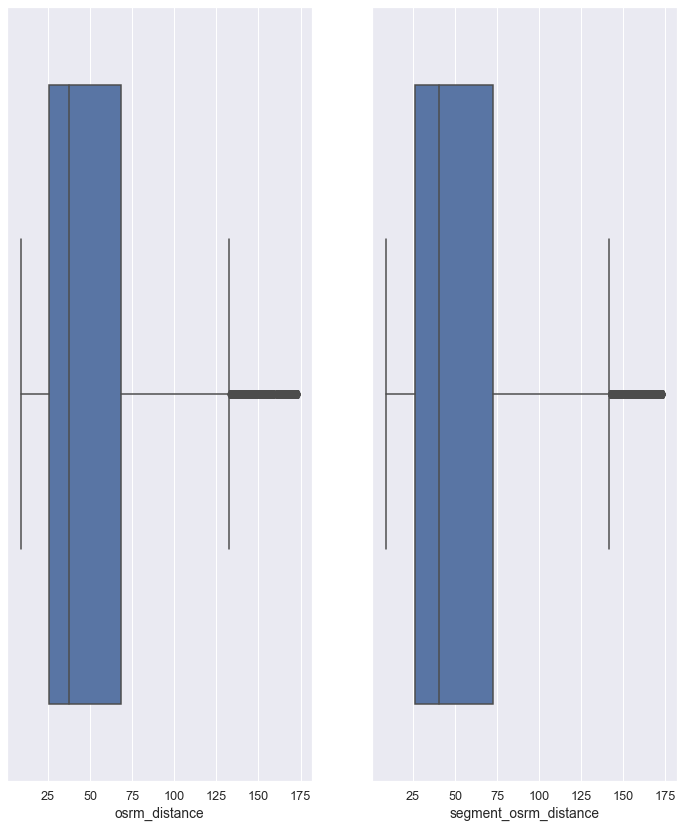

In [170]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="osrm_distance", ax=axis[0])
sns.boxplot(data=df3, x="segment_osrm_distance", ax=axis[1])
plt.show()

# Observations:

* According Shapiro wilk test we can conclude that they come from normal distribution.
* By Box plot found outliers and removed them.
* now we are ready to perform Test.

# Testing

In [172]:
t_test, p_value = stats.ttest_rel(osrm_distance_data,segment_osrm_data)
t_test, p_value

(-4.546926469823559, 5.572074688598806e-06)

In [173]:
HTResult(p_value)

Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value < alpha(0.05) , we  reject H0 
2. Thus we can say that there is difference between osrm_distance and segment_osrm_distance.

# 5. Do hypothesis testing between osrm time aggregated value and segment osrm time aggregated value

# Paired T Test is used for finding difference between osrm time aggregated value and segment osrm time aggregated value


Step 1: Define Null & Alternate Hypothesis

*  H0 : difference between osrm time aggregated value  and segment osrm time aggregated value  is zero.
*  Ha : difference between osrm time aggregated value  and segment osrm time aggregated value is not zero.
*  alpha = 0.05


Step 2: Validate the assumptions

    • The dependent variable must be continuous (interval/ratio).
    • The observations are independent of one another.
    • The dependent variable should be approximately normally distributed.
    • The dependent variable should not contain any outliers.
    

In [187]:
osrm_time_data = df3['osrm_time'].sample(5000)
segment_osrm_data = df3['segment_osrm_time'] .sample(5000)

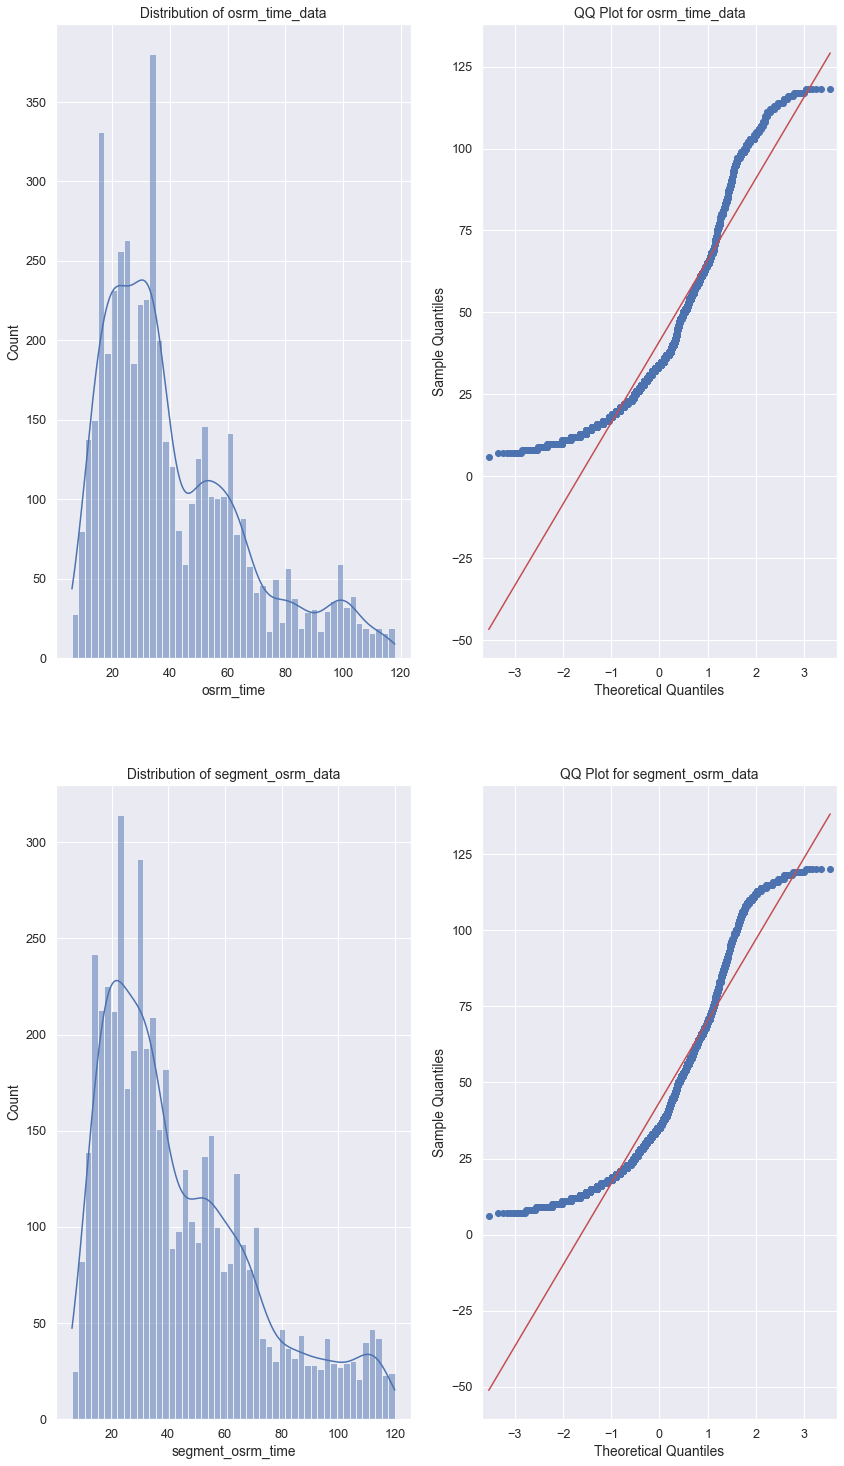

In [193]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# osrm_time_data
sns.histplot(data=osrm_time_data,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of osrm_time_data')
sm.qqplot(osrm_time_data, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for osrm_time_data')

# segment_osrm_data
sns.histplot(data=segment_osrm_data,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of segment_osrm_data')
sm.qqplot(segment_osrm_data, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for segment_osrm_data')


plt.show()

In [175]:
# doing shapiro wilk test to test normality

In [179]:
stats.shapiro(osrm_time_data)

ShapiroResult(statistic=0.8732582330703735, pvalue=0.0)

In [180]:
stats.shapiro(segment_osrm_data)

ShapiroResult(statistic=0.8492311239242554, pvalue=0.0)

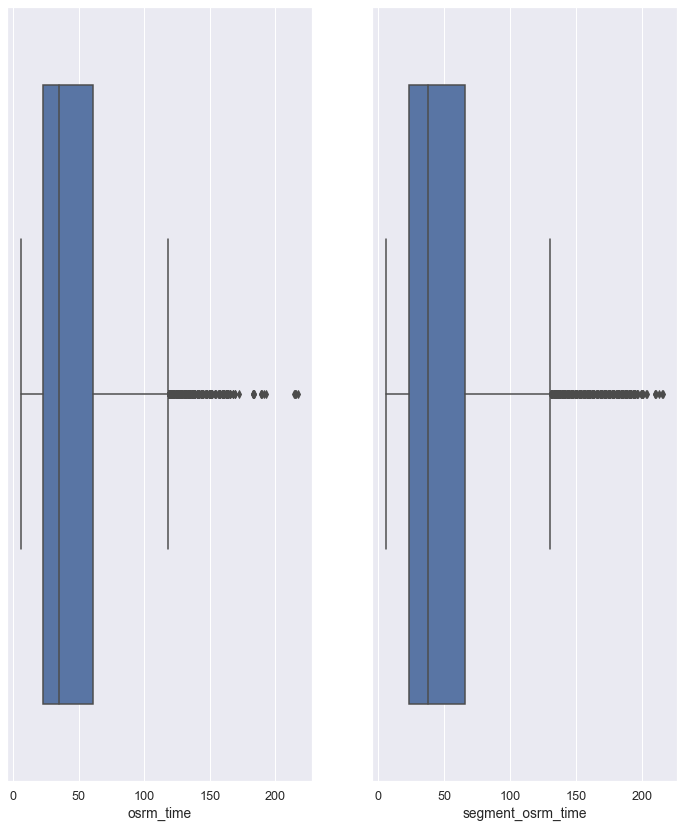

In [181]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="osrm_time", ax=axis[0])
sns.boxplot(data=df3, x="segment_osrm_time", ax=axis[1])
plt.show()

In [182]:
q1=df3['osrm_time'].quantile(0.25)
q3=df3['osrm_time'].quantile(0.75)
iqr=q3-q1

In [183]:
df3=df3[(df3['osrm_time']<=q3+1.5*iqr) & (df3['osrm_time']>=q1-1.5*iqr)]

In [184]:
q1=df3['segment_osrm_time'].quantile(0.25)
q3=df3['segment_osrm_time'].quantile(0.75)
iqr=q3-q1

In [185]:
df3=df3[(df3['segment_osrm_time']<=q3+1.5*iqr) & (df3['segment_osrm_time']>=q1-1.5*iqr)]

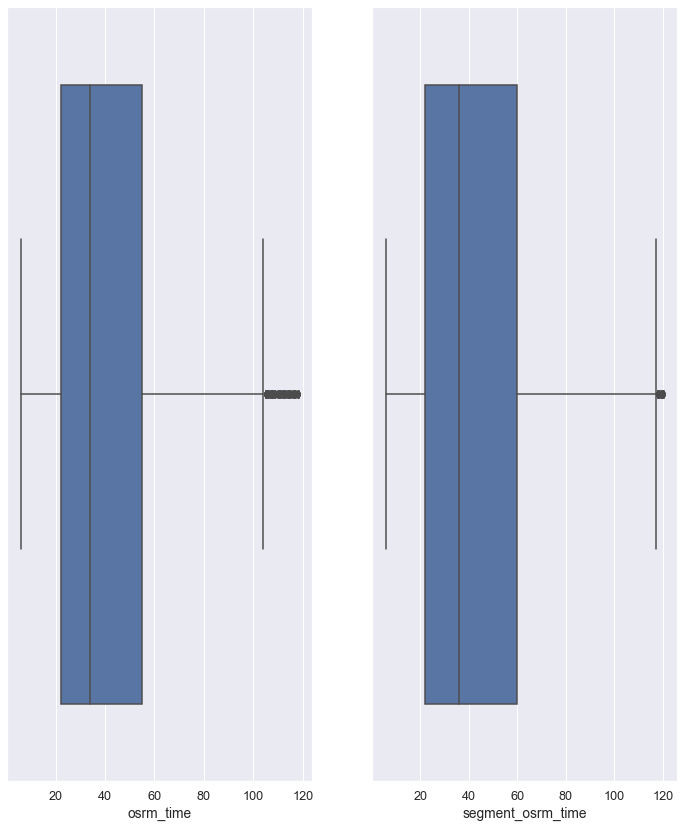

In [186]:
#Box plot for detecting outliers
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df3, x="osrm_time", ax=axis[0])
sns.boxplot(data=df3, x="segment_osrm_time", ax=axis[1])
plt.show()

# Observations:

* According Shapiro wilk test we can conclude that they come from normal distribution.
* By Box plot found outliers and removed them.
* now we are ready to perform Test.

# Testing

In [188]:
t_test, p_value = stats.ttest_rel(osrm_time_data,segment_osrm_data)
t_test, p_value

(-4.477500465406611, 7.720290678409274e-06)

In [189]:
HTResult(p_value)

Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value < alpha(0.05) , we  reject H0 
2. Thus we can say that there is difference between osrm_time and segment_osrm_time.

In [207]:
# Fetching Important insights from data

In [233]:
df3['Source_City'].value_counts().sort_values(ascending=False).head(5)

Bangalore_Nelmngla_H      514
Bhiwandi_Mankoli_HB       497
Gurgaon_Bilaspur_HB       437
Bengaluru_Bomsndra_HB     413
Mumbai Hub                299
Name: Source_City, dtype: int64

In [234]:
df3['Dest_City'].value_counts().sort_values(ascending=False).head(5)

Bhiwandi_Mankoli_HB       364
Bangalore_Nelmngla_H      363
Gurgaon_Bilaspur_HB       336
Bengaluru_Bomsndra_HB     314
Bengaluru_KGAirprt_HB     272
Name: Dest_City, dtype: int64

In [235]:
df3['Source_State'].value_counts().sort_values(ascending=False).head(5)

Maharashtra    2062
Karnataka      1749
Haryana         918
Tamil Nadu      718
Delhi           587
Name: Source_State, dtype: int64

In [236]:
df3['Dest_State'].value_counts().sort_values(ascending=False).head(5)

Maharashtra    2050
Karnataka      1751
Haryana         936
Tamil Nadu      720
Delhi           537
Name: Dest_State, dtype: int64

In [253]:
dfn=df3.groupby(['Source_City','Dest_City'])['trip_uuid'].count().sort_values(ascending=False).head(5)
dfn

Source_City             Dest_City             
Bangalore_Nelmngla_H    Bengaluru_KGAirprt_HB     151
Bengaluru_Bomsndra_HB   Bengaluru_KGAirprt_HB     121
Bengaluru_KGAirprt_HB   Bangalore_Nelmngla_H      108
Bhiwandi_Mankoli_HB     Mumbai Hub                105
Bangalore_Nelmngla_H    Bengaluru_Bomsndra_HB     100
Name: trip_uuid, dtype: int64

In [254]:
dfn=df3.groupby(['Source_State','Dest_State'])['trip_uuid'].count().sort_values(ascending=False).head(5)
dfn

Source_State  Dest_State 
Maharashtra   Maharashtra    2049
Karnataka     Karnataka      1746
Tamil Nadu    Tamil Nadu      718
Haryana       Haryana         552
Gujarat       Gujarat         454
Name: trip_uuid, dtype: int64

# Observations:

*  Most Orders are plced and started from Maharastra state.
*  Most orders are placed from Bhiwandi_Mankoli_HB city.
*  Most Orders are started from Bangalore_Nelmngla_H city.
*  The Busiest Route is Bangalore_Nelmngla_H to Bengaluru_KGAirprt_HB.
*  And coming to States maximum orders are transporting inside of Maharastra itself (seems like source and destination 
   are both in same state).
*  The average Distance between Bangalore_Nelmngla_H to Bengaluru_KGAirprt_HB is 28km and average time taken is 81.


# Conclusions(Important Observations)

* There are some missing values in Source and Destination names and  filled them with data.
* Outliers are present in all numerical values.
* Similar mean of distance is covered on both the months based on plots.
* Compared to Carting , FTL took more average time in distance and time aspects.
* Similar mean distance and time taken on almost all days present in data.
* outliers are present in almost most of data but for now we won't remove them.
* plotted all combination of bivariate variables but can't confirm particular insights.
* further Hypothesis testing is done on these numerical variables regarding relationship betweem them.
* Average time taken for carting is more than FTL.
* Hypothesis Testing Conclusion
    * There is no difference between total_od_time and start_scan_to_end_scan.
    * There is difference between actual_time and osrm_time.
    * There is no difference between actual_time and segment_actual_time.
    * There is difference between osrm_distance and segment_osrm_distance.
    * There is difference between osrm_time and segment_osrm_time.
* Other Conclusions
    *  Most Orders are plced and started from Maharastra state.
    *  Most orders are placed from Bhiwandi_Mankoli_HB city.
    *  Most Orders are started from Bangalore_Nelmngla_H city.
    *  The Busiest Route is Bangalore_Nelmngla_H to Bengaluru_KGAirprt_HB.
    *  And coming to States maximum orders are transporting inside of Maharastra itself (seems like source and destination 
       are both in same state).
    *  The average Distance between Bangalore_Nelmngla_H to Bengaluru_KGAirprt_HB is 28km and average time taken is 81.

# Recommendations

* Some Time Difference is seen from actual Time and osrm Time. company should try to reduce the osrm time so that parcels     will deliver Quickly.
* Some DIfference is seen in osrm Distance and Segment distance. Company should search for shorter route to reduce the       waiting time for customers receiving parcels.
* Some Difference is seen in osrm_time and segment_osrm_time. Company has a scope for reducing the time for delivering by     considering some external Factors like cost of parcel and priority for respective. 
* Company should focus on Most Busiest Route like adding more trucks or vans for parcel Load.
* Company should consider FTL even for Transporting within states so that it can reduce some time.
* Comapny should increase the delivery agents for carting so that it will reduce some time for Delivering parcels.